## Problem

The advent of online hotel reservation channels has had a profound impact on how bookings are made and how customers behave. A significant number of hotel reservations are cancelled or result in no-shows. Common reasons for cancellations include changes in plans or conflicting schedules. Many hotels offer the option to cancel free of charge or at a low cost, which benefits guests but can be challenging for hotels in terms of revenue. In this analysis, we will be working with a dataset called "Hotel Reservation.csv," which contains 36275 values and 19 columns. We will explore the data, process it, and use machine learning classification models to achieve our objective.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# **1. Dataset import**


In [2]:
# import dataset from local
df = pd.read_csv("Hotel_Reservations.csv", sep = ',')

In [3]:
# alternative dataset import
url = 'https://raw.githubusercontent.com/nthang2/Reserver-prediction/main/Hotel_Reservations.csv'
df = pd.read_csv(url)

Here the explanation about the variables:
    - Booking_ID: unique identifier of each booking
    -no_of_adults: Number of adults
    -no_of_children: Number of Children
    -no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    -no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    -type_of_meal_plan: Type of meal plan booked by the customer:
    -required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
    -room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    -lead_time: Number of days between the date of booking and the arrival date
    -arrival_year: Year of arrival date
    -arrival_month: Month of arrival date
    -arrival_date: Date of the month
    -market_segment_type: Market segment designation.
    -repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
    -no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
    -no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
    -avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    -no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    -booking_status: Flag indicating if the booking was canceled or not.

In [4]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

->Here we can see that we have categorical and continuous variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 ##   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date                          36275 non-null  int64  
 12  market_segment_type                   36275 non-null  object
 13  repeated_guest                        36275 non-null  int64  
 14  no_of_previous_cancellations          36275 non-null  int64  
 15  no_of_previous_bookings_not_canceled  36275 non-null  int64  
 16  avg_price_per_room                    36275 non-null  float64
 17  no_of_special_requests                36275 non-null  int64  
 18  booking_status                        36275 non-null  object
dtypes: float64(1), int64(13), object(5)
memory usage: 5.3+ MB

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
(df.isnull().sum()/len(df))

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

-> Column Booking ID that will probably not be used, we can also see that we don't have null values.

# **2. Data Analysis**


Verifying the correlation between our variables:

<Axes: >

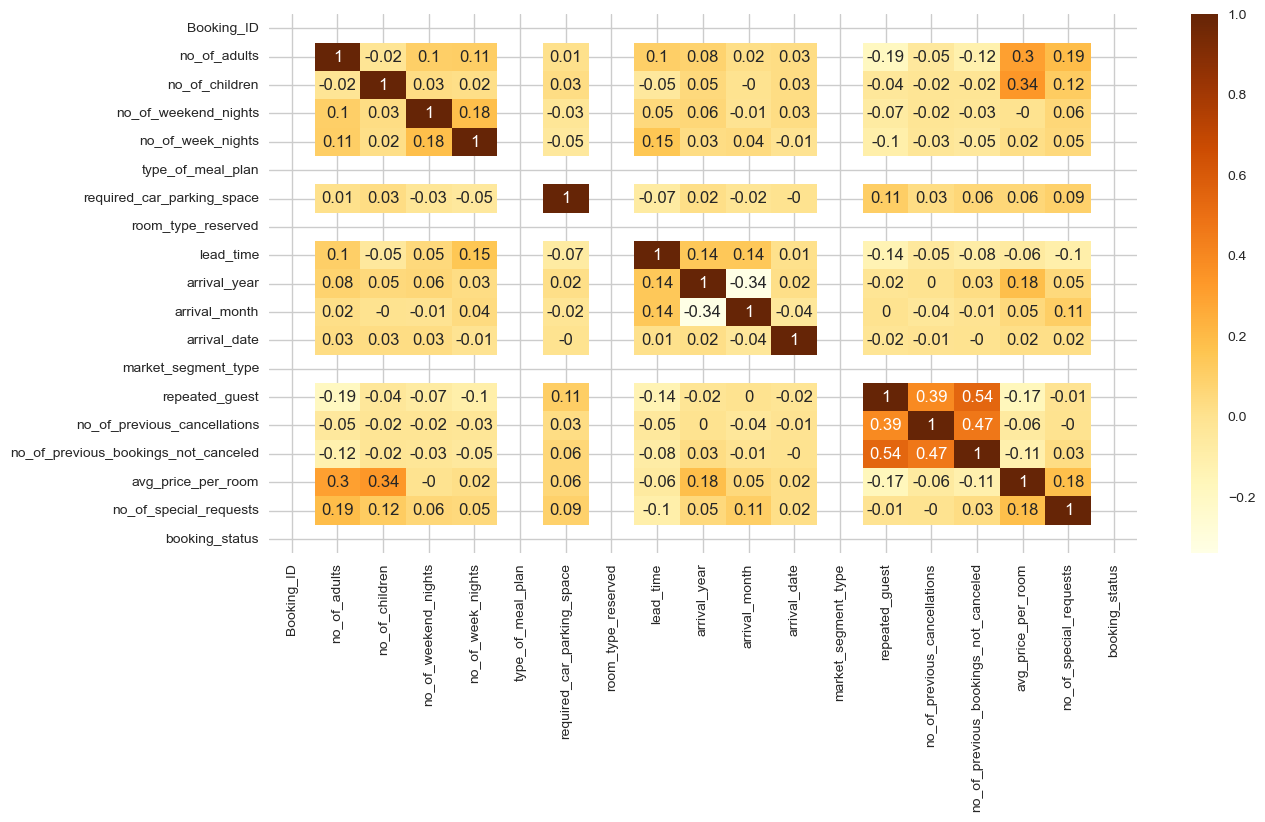

In [8]:
correlation = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

-> No strong correlation between the variables.


## Categorical Variables


<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

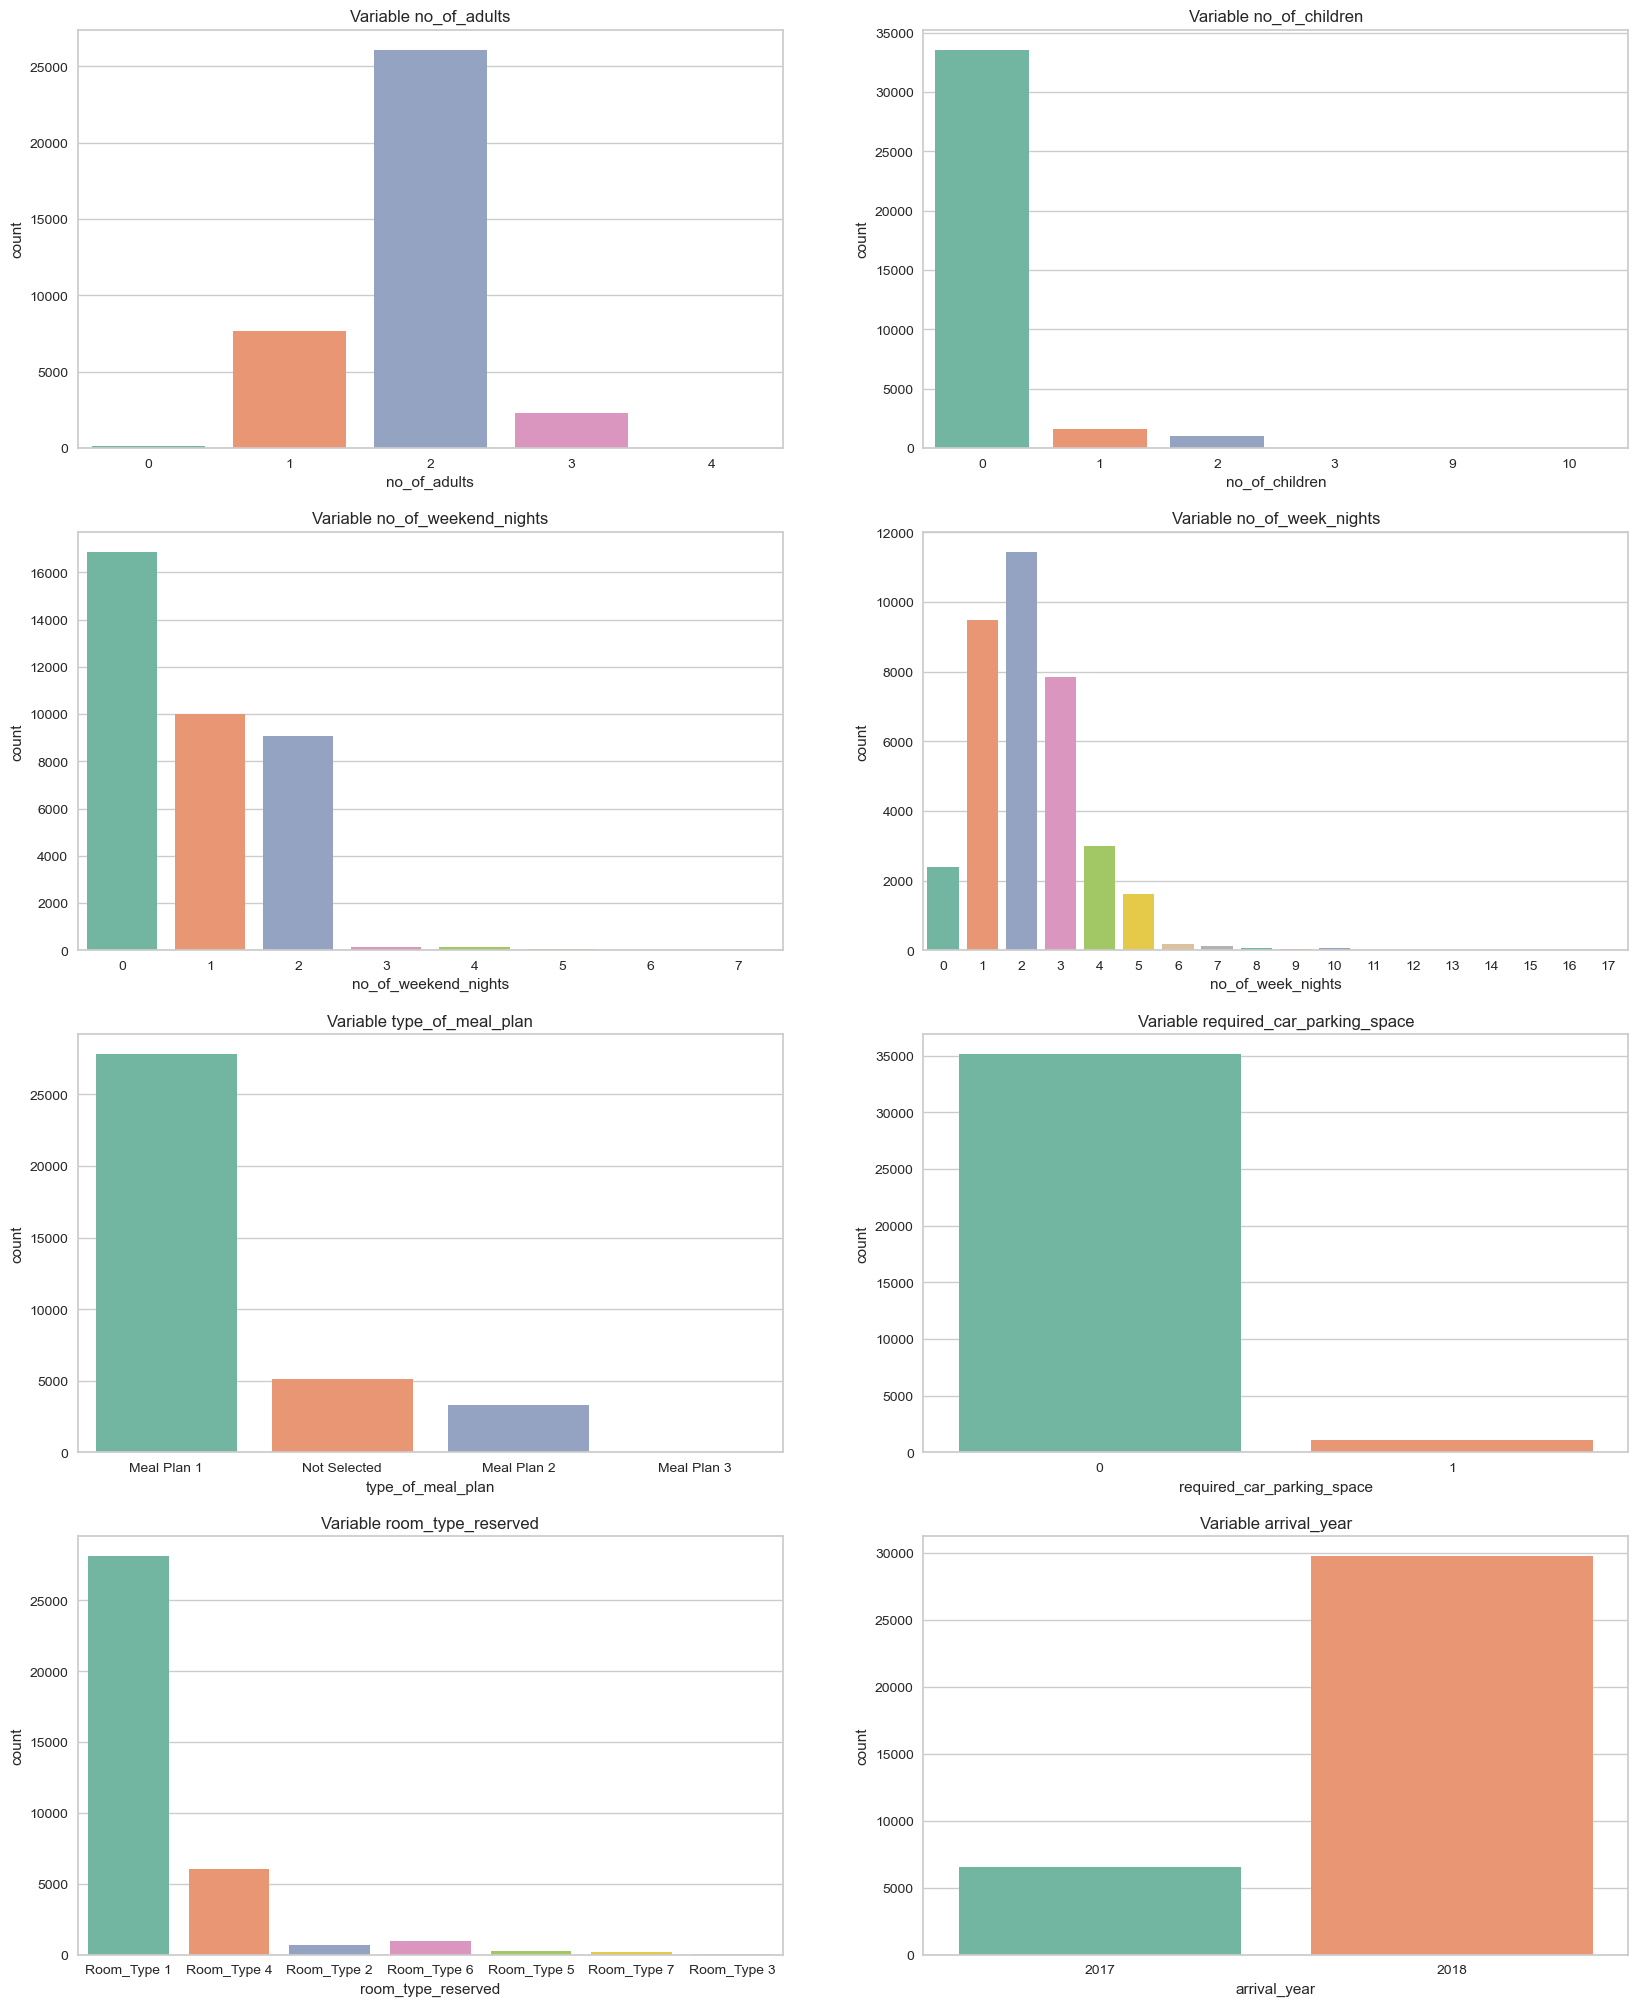

In [9]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

->Looking at our categorical variables, we can see that most reservations are made for rooms with two adults, without children, generally reservations are short-term, not many cases are long-term, most reservations select meal_plan_1, no need a car space, the most booked room types are types 1 and 4 and most of our data is 2018 bookings.

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

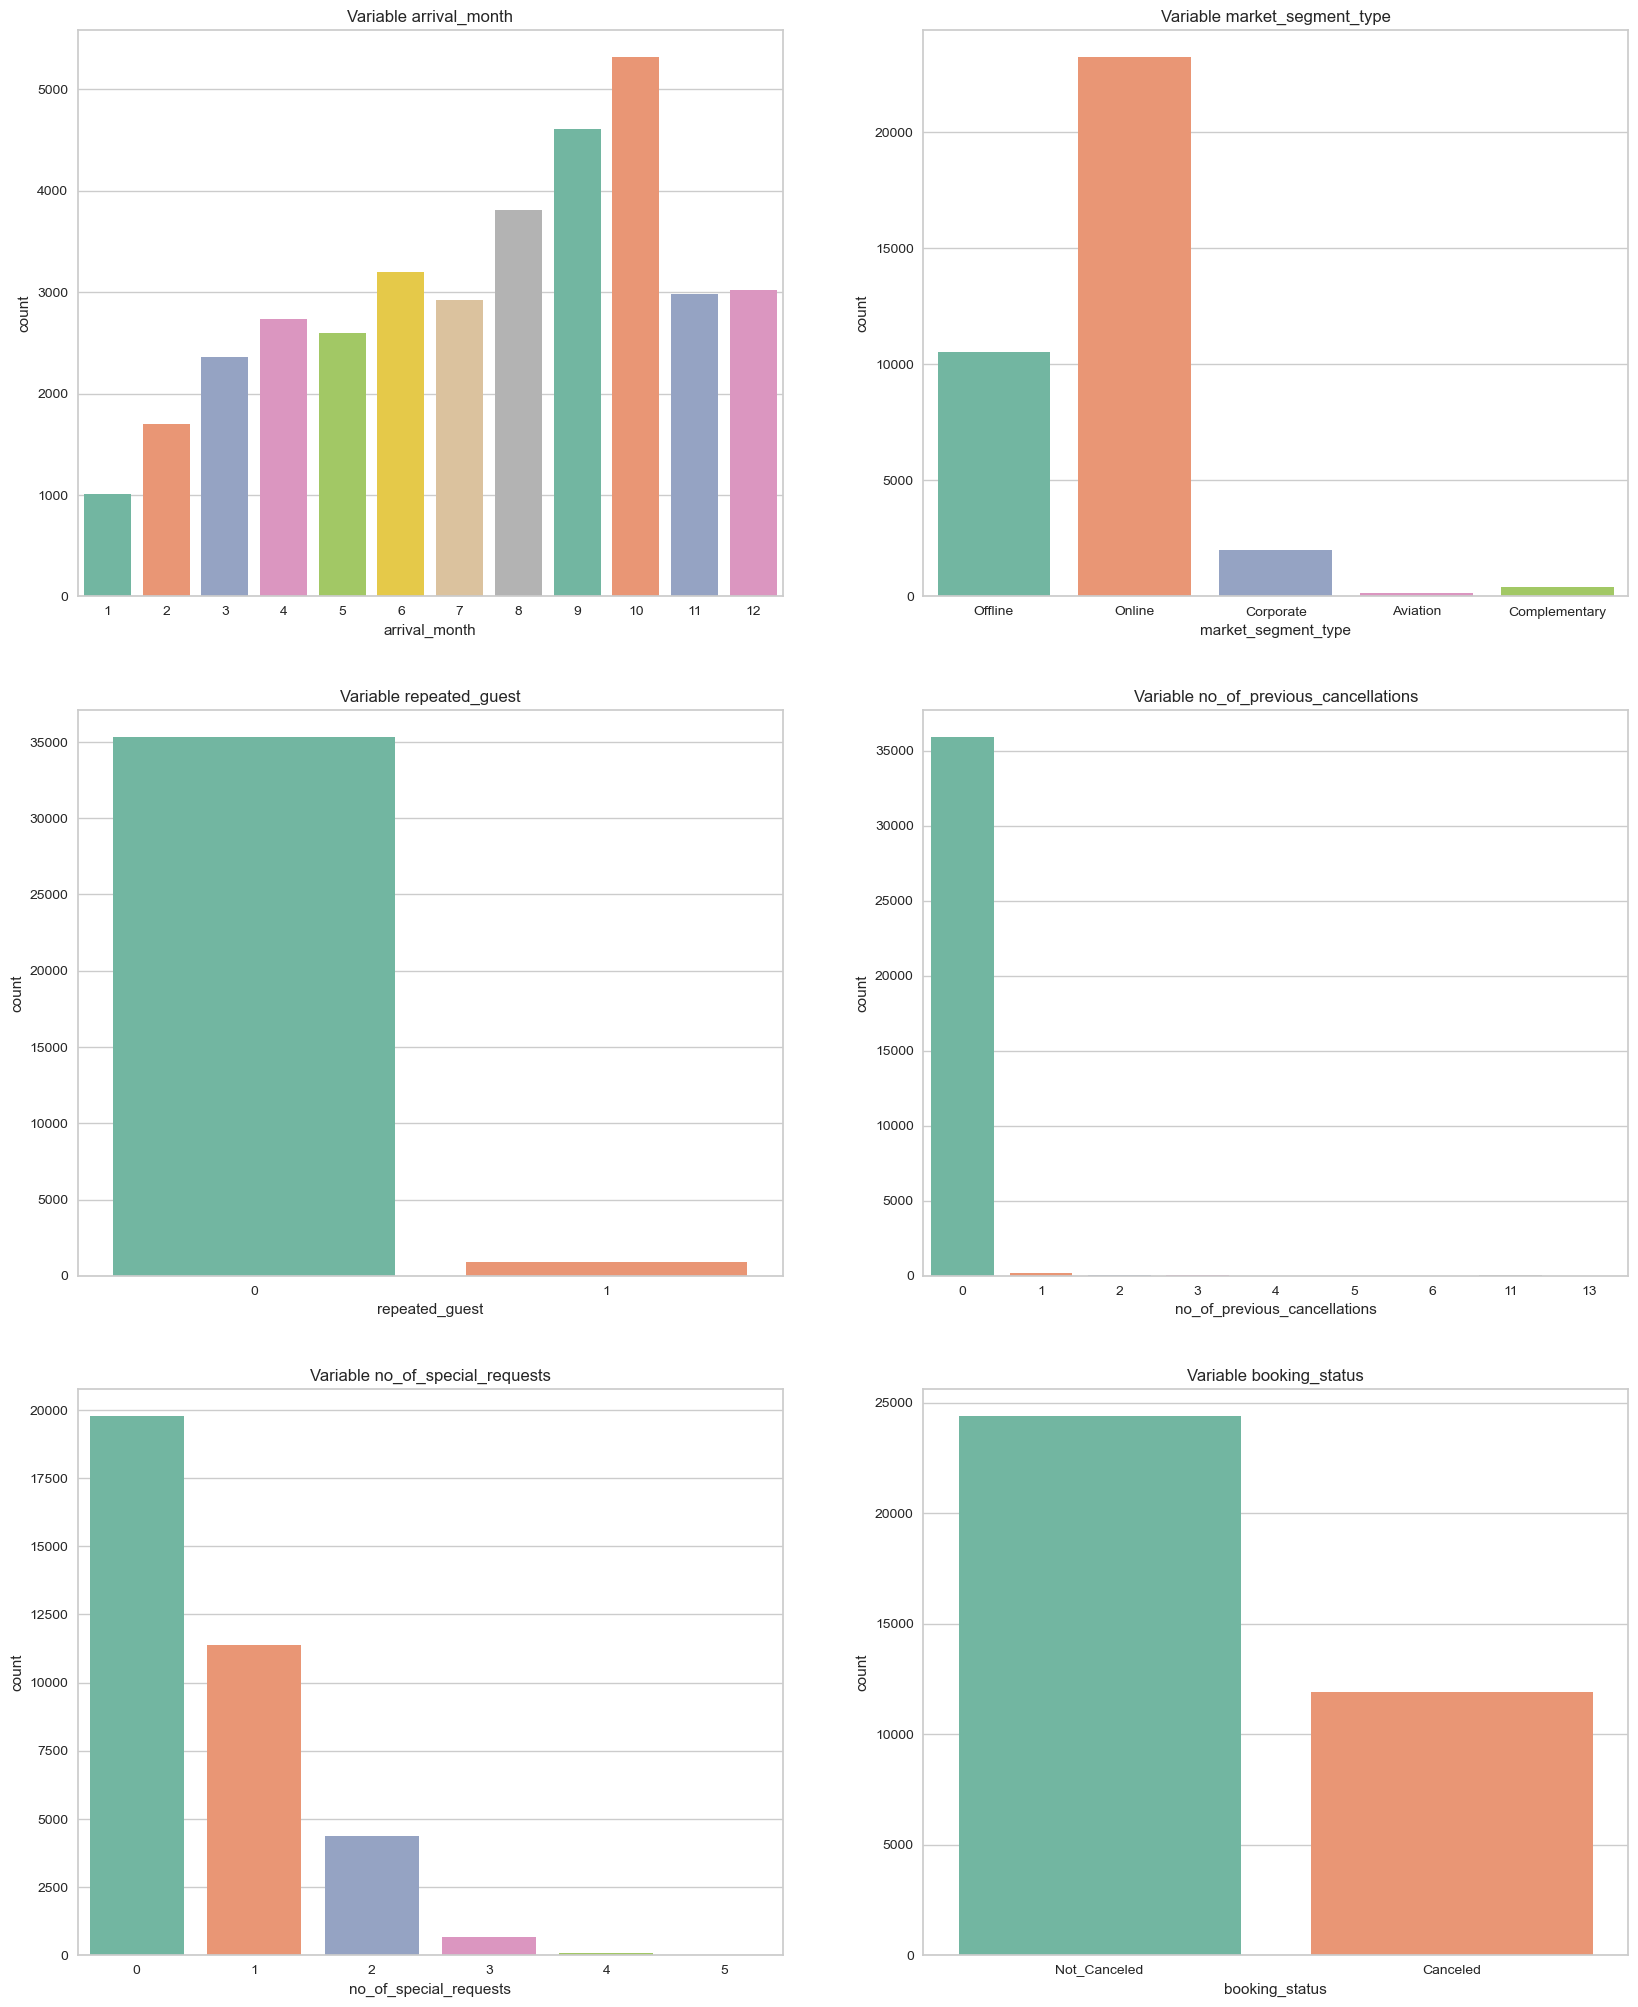

In [10]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)


->When we look at the bookings by month, we can see that there is an increase, from January to October the number of bookings gradually grows and it drops again in the months of November and December, most bookings are made online, most of the guests are guests who they have never been to the hotel and are usually guests who have never canceled, the greater the number of special requests, the less data we have. When we look at our target variable, we can see that we have approximately 65% of reservations that have not been cancelled.

## Continous Variables


<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

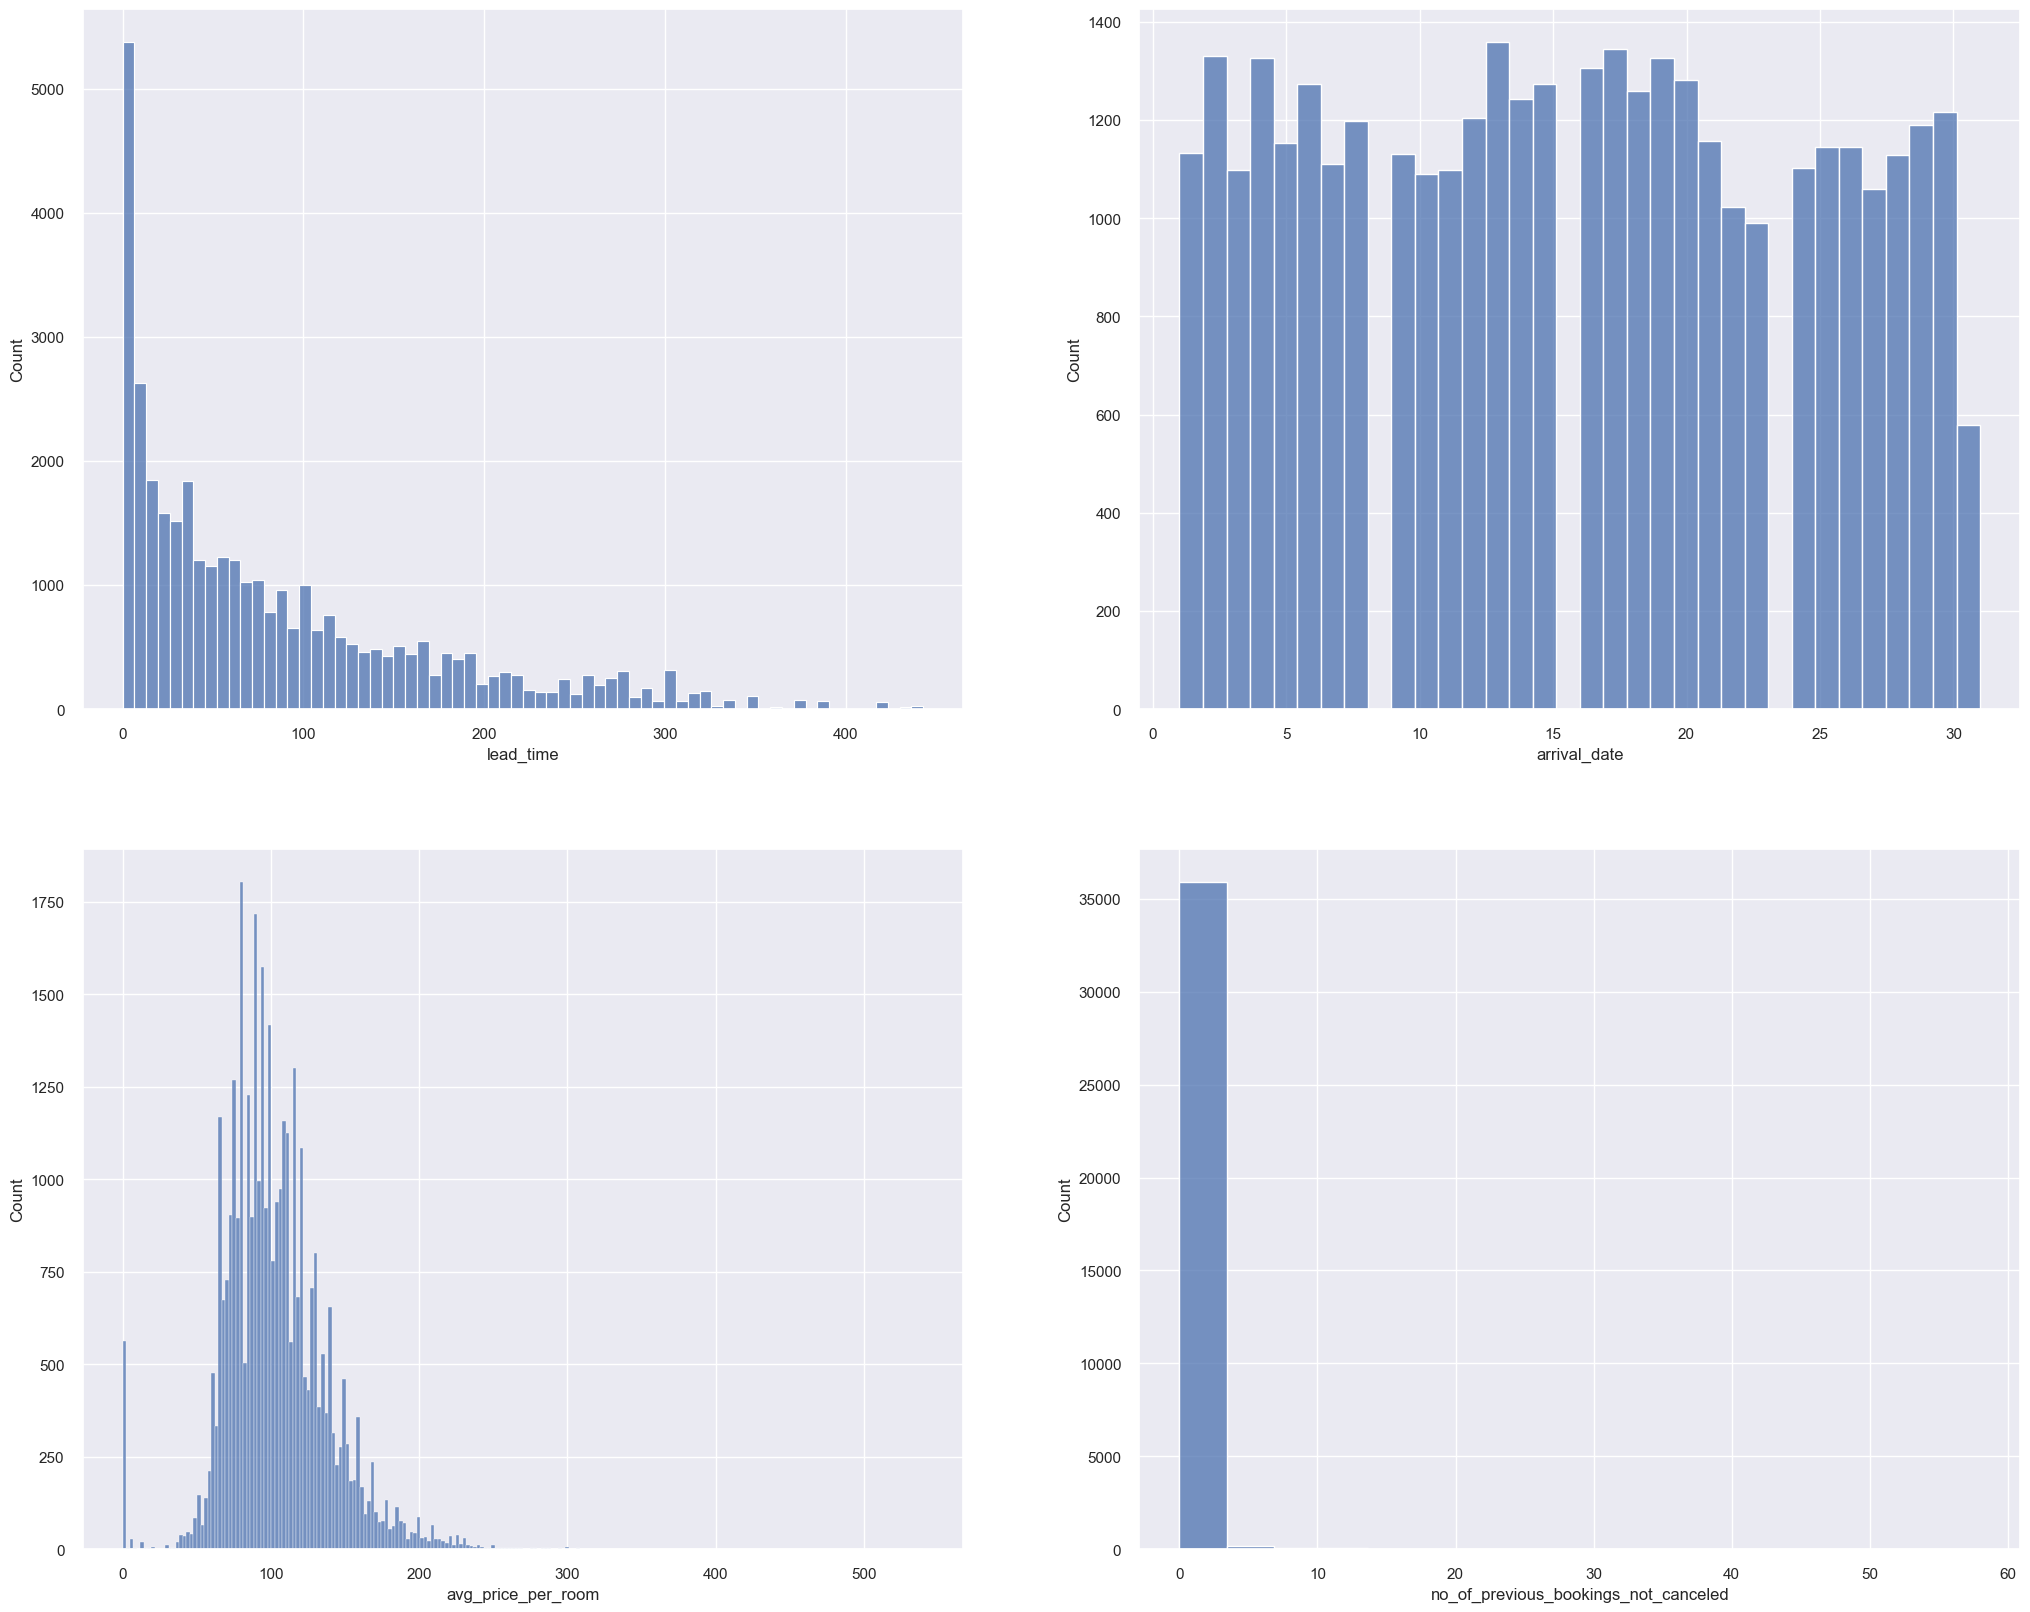

In [11]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)


->Looking at our continuous variables we can see that generally reservations are made without taking too long, the longer it takes, the smaller the number of reservations, we can see that the top of our data is usually at 100 euros the average price of the room and that the guests usually never canceled a booking before.

Checking Boxplots


<Axes: title={'center': 'Boxplot lead_time'}, xlabel='lead_time'>

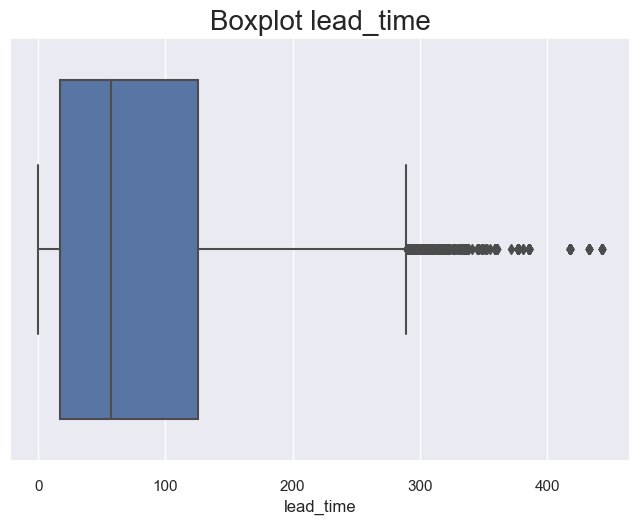

In [12]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

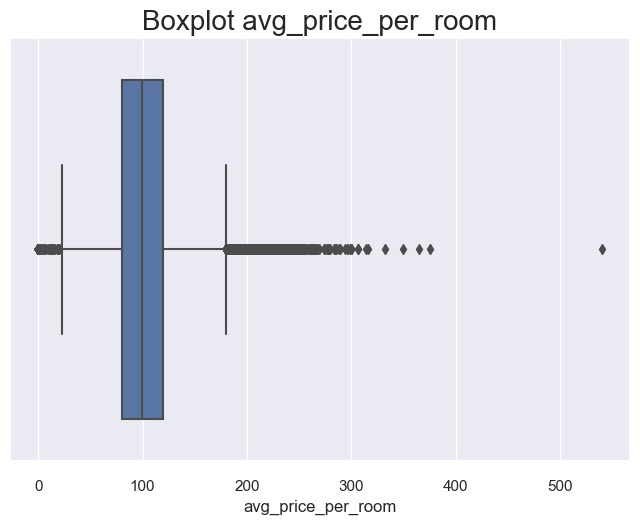

In [13]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

->We can see that it has some outliers but for now we are not going to deal with them.

## Bivariate Analysis



<Axes: xlabel='booking_status', ylabel='count'>

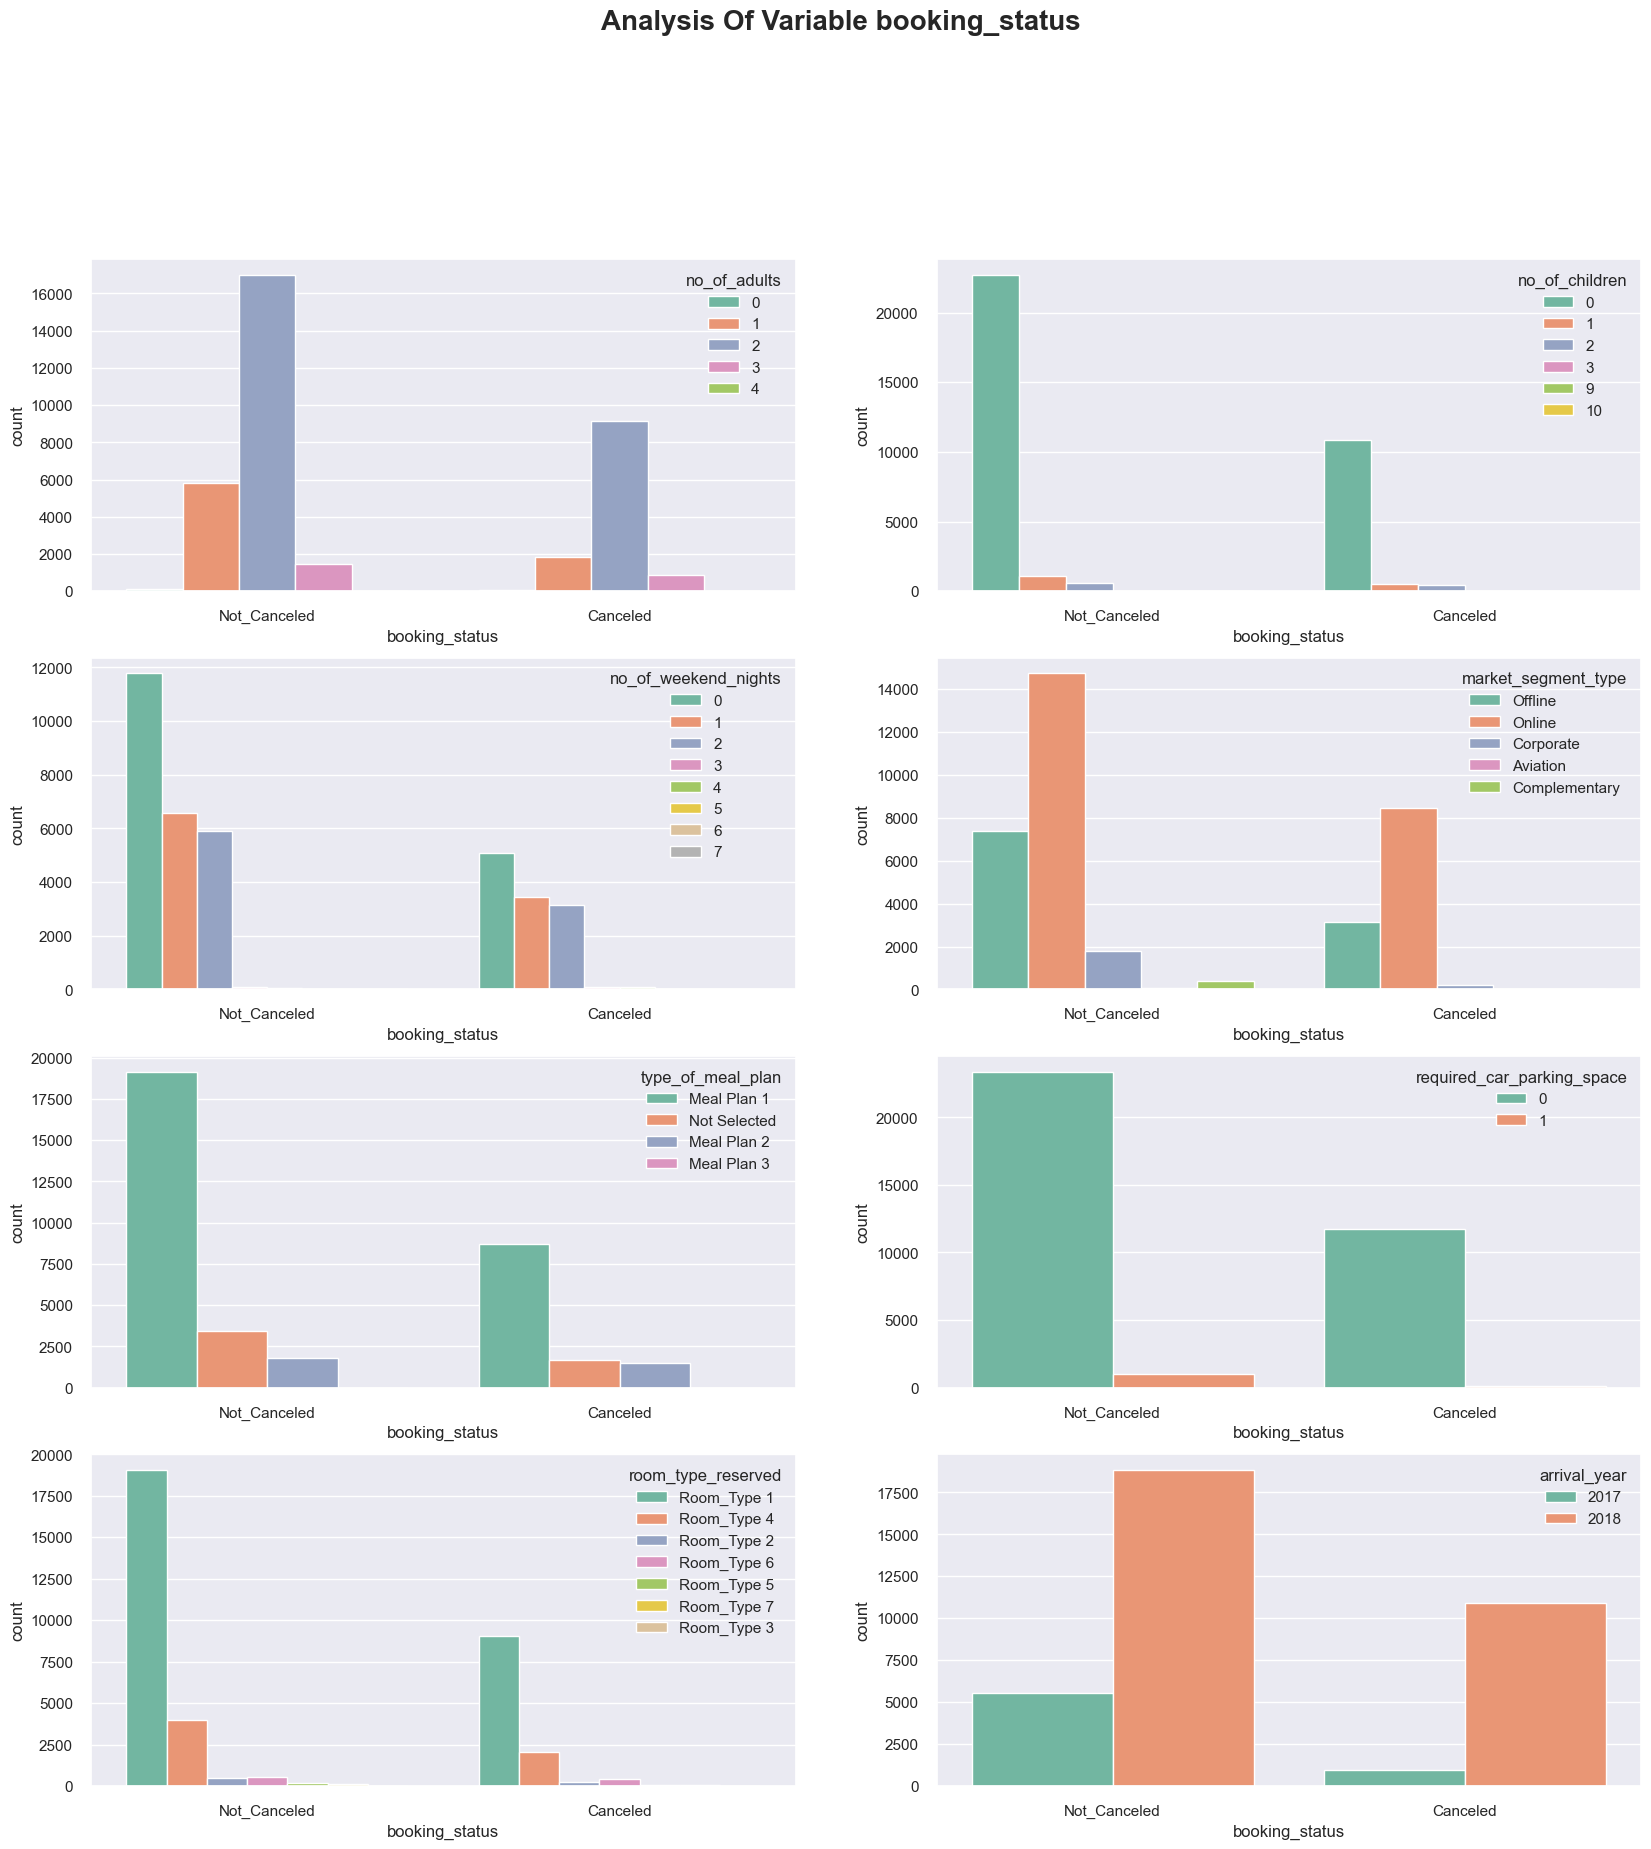

In [14]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

->Looking at our target variable, we can have some insights, generally guests who request a parking space, guests who have stayed previously are guests who generally do not cancel the reservation, guests who request special requests are guests less likely to cancel, the more requests, the less probably.

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

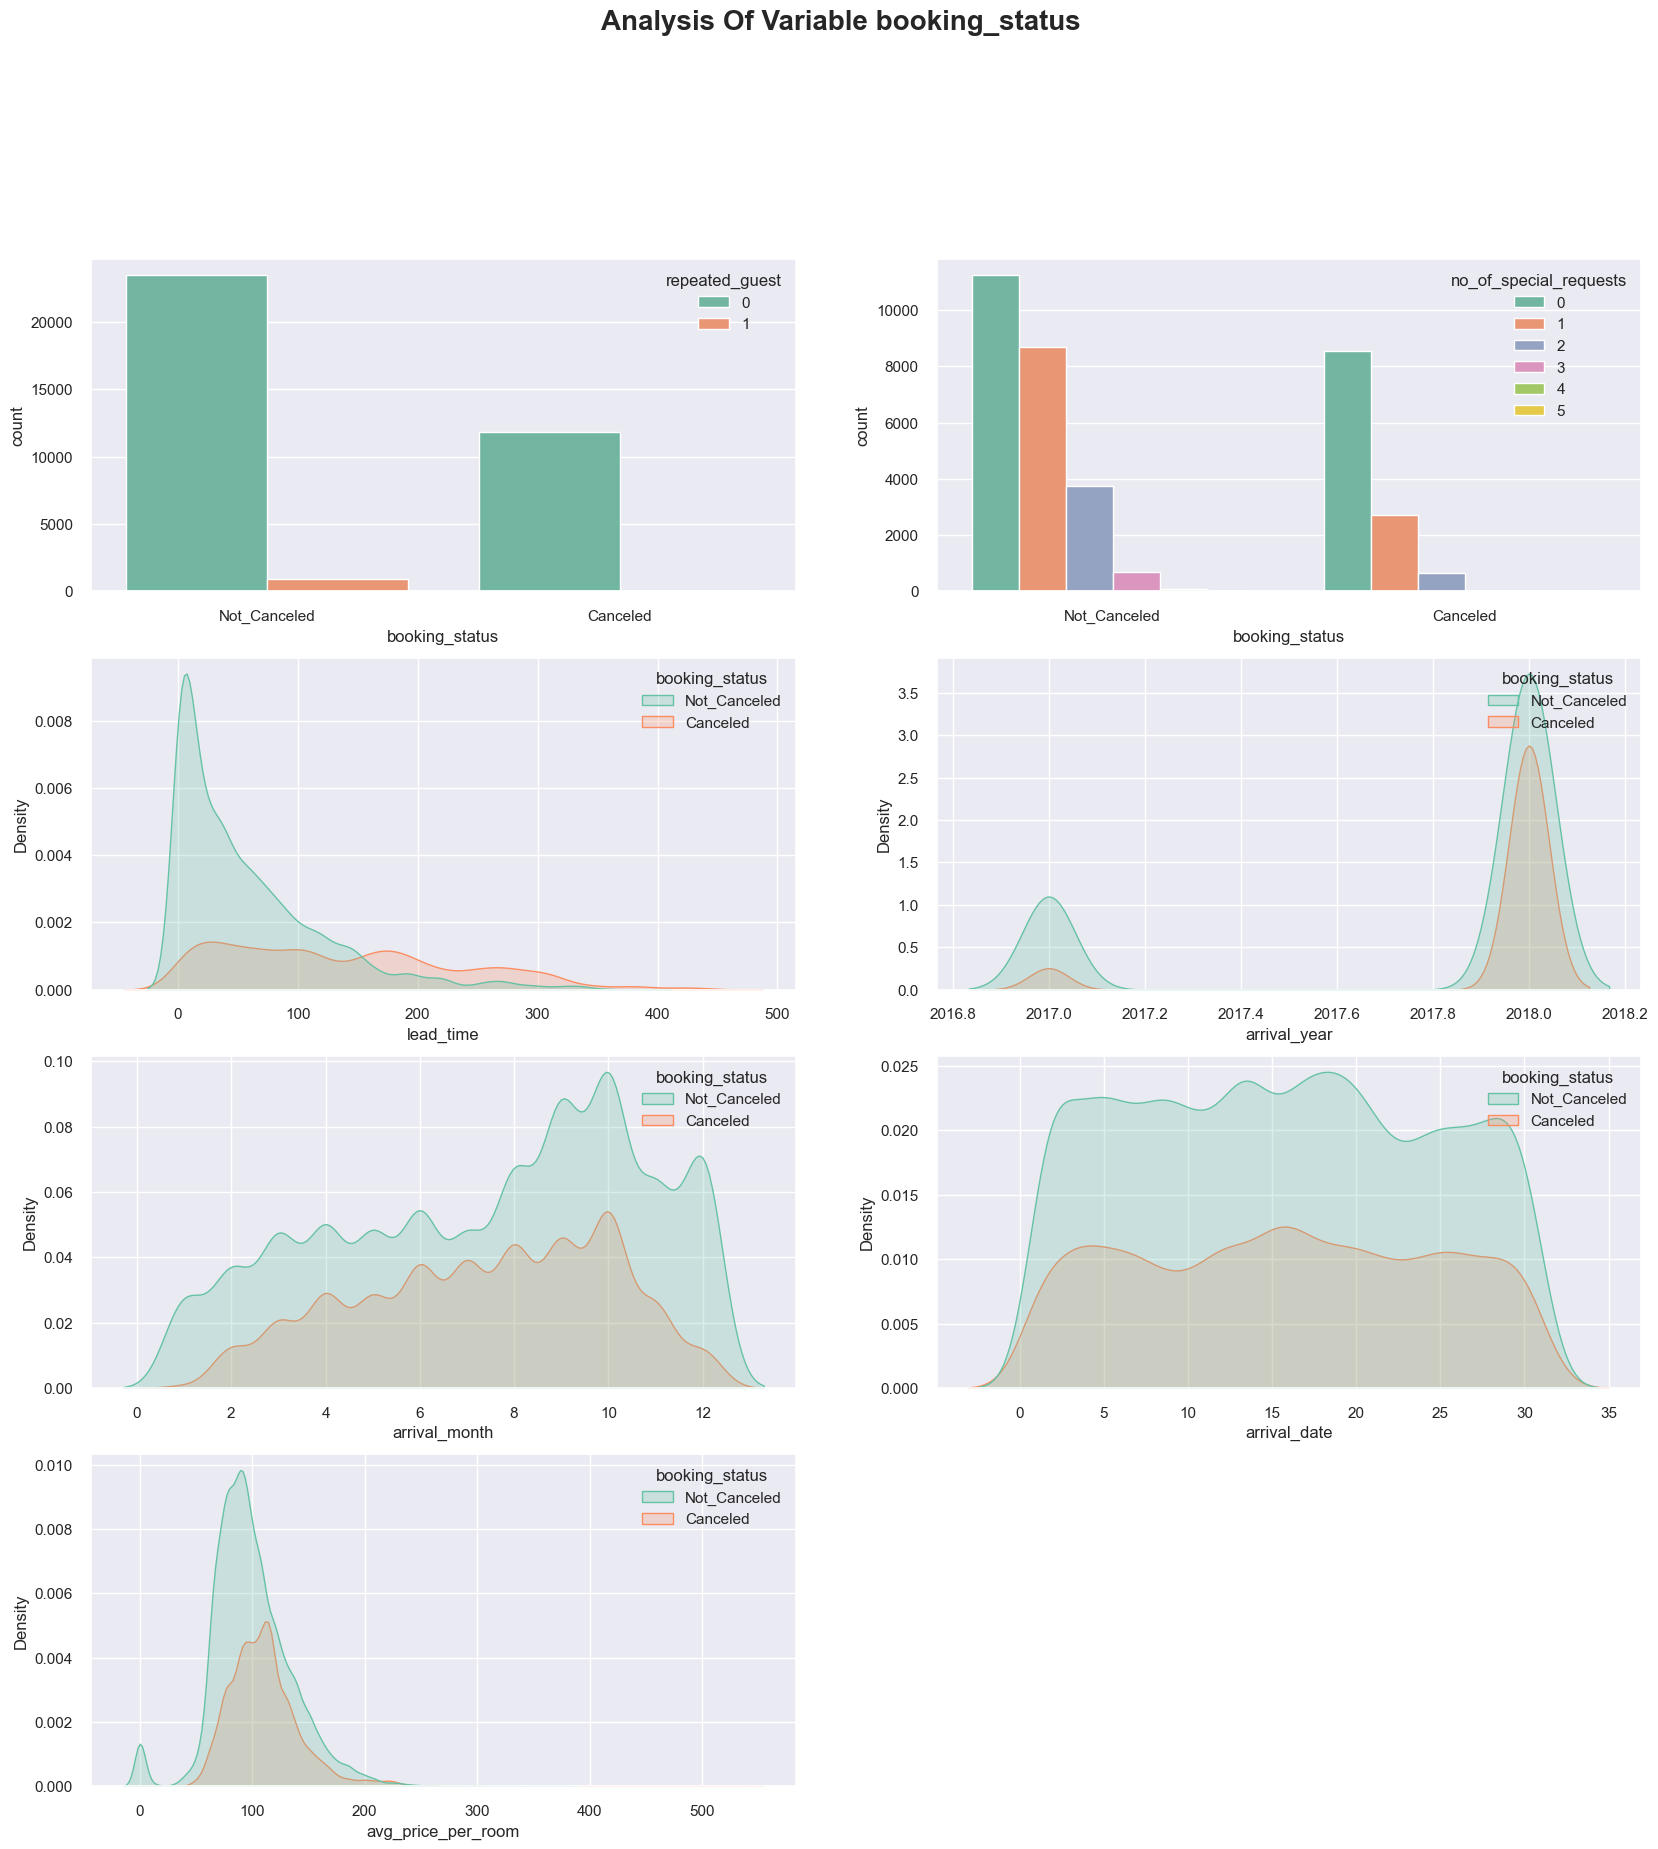

In [15]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', fill=True, data=df)



->The biggest distortion we see here is the Lead_Time variable, the longer the person takes to book the room, the more likely they are to cancel, which makes a lot of sense, another interesting view is that in the final 3 months of the year we usually have less cancellations, despite being a slight incline, we can see that more expensive rooms may also experience more cancellations.

Now, as we saw earlier, the Lead_Time variable was the one that had the most differentiation between canceled and non-cancelled, so let's take a deeper look at it 

<Axes: xlabel='lead_time', ylabel='Density'>

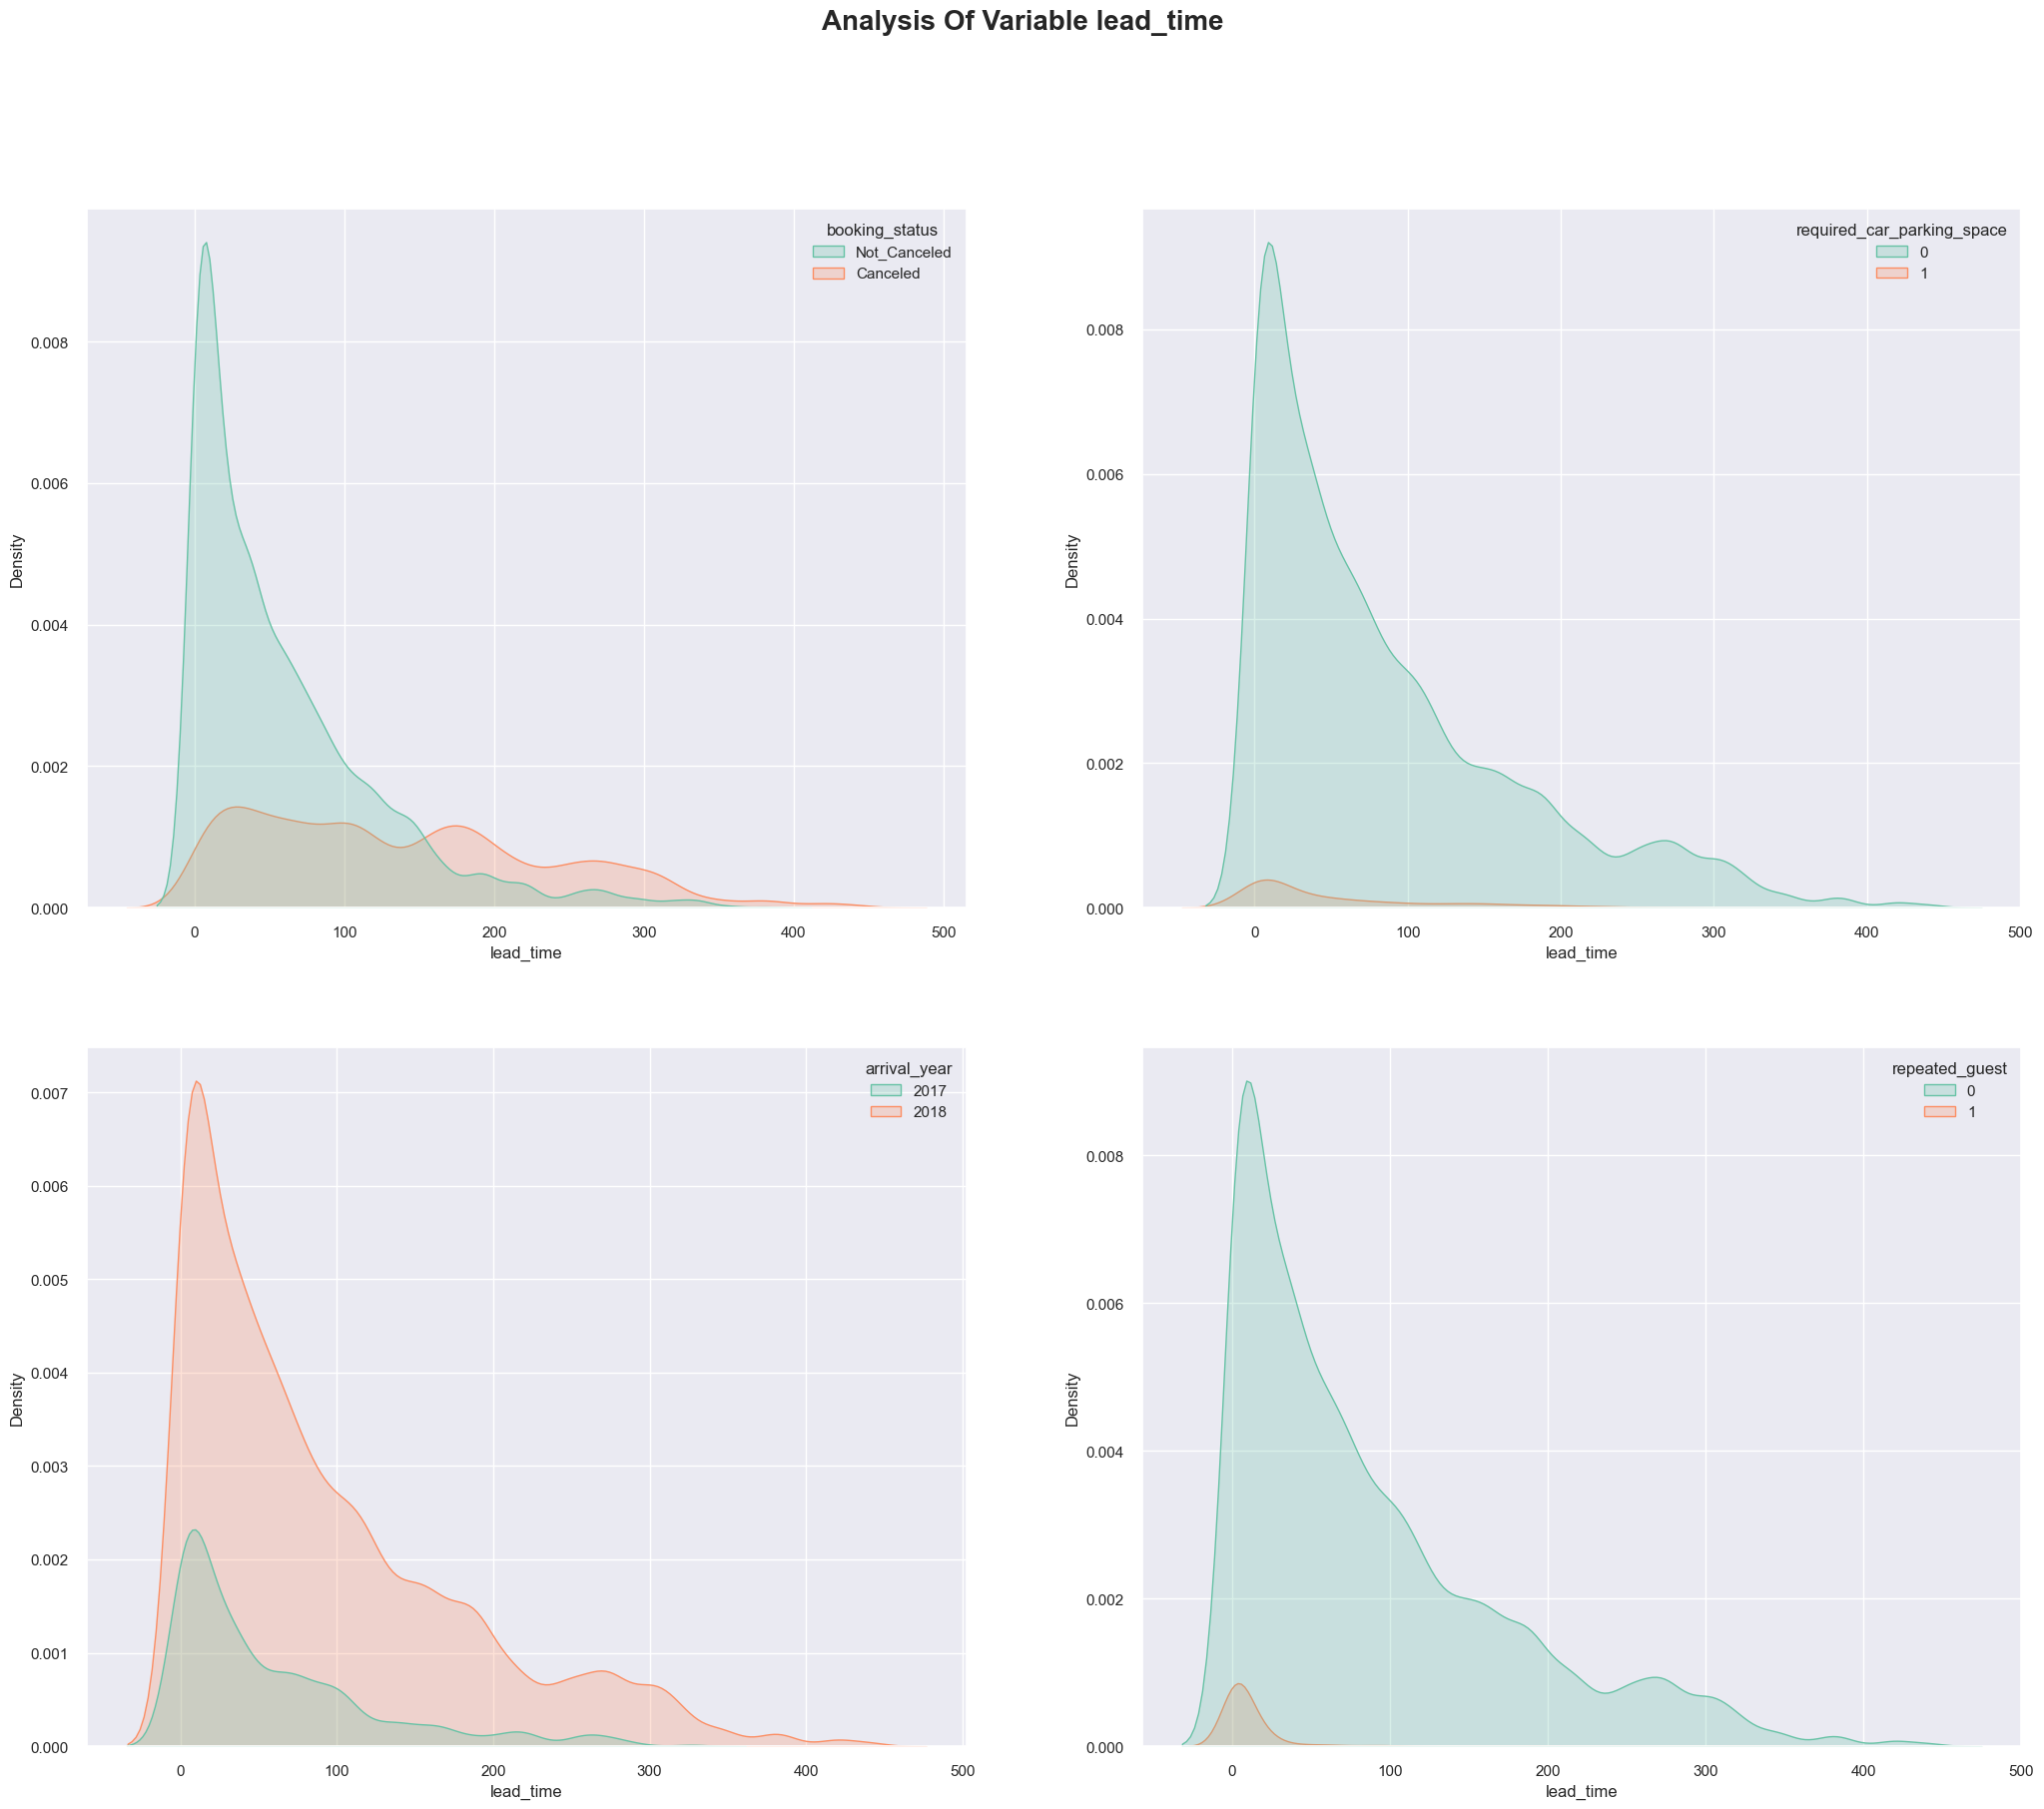

In [16]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', fill=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', fill=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', fill=True, data=df)

->We can see that generally those who request a car parking space have a shorter lead time, we see the same something with guests who have already stayed at the hotel.

<Axes: xlabel='no_of_special_requests', ylabel='lead_time'>

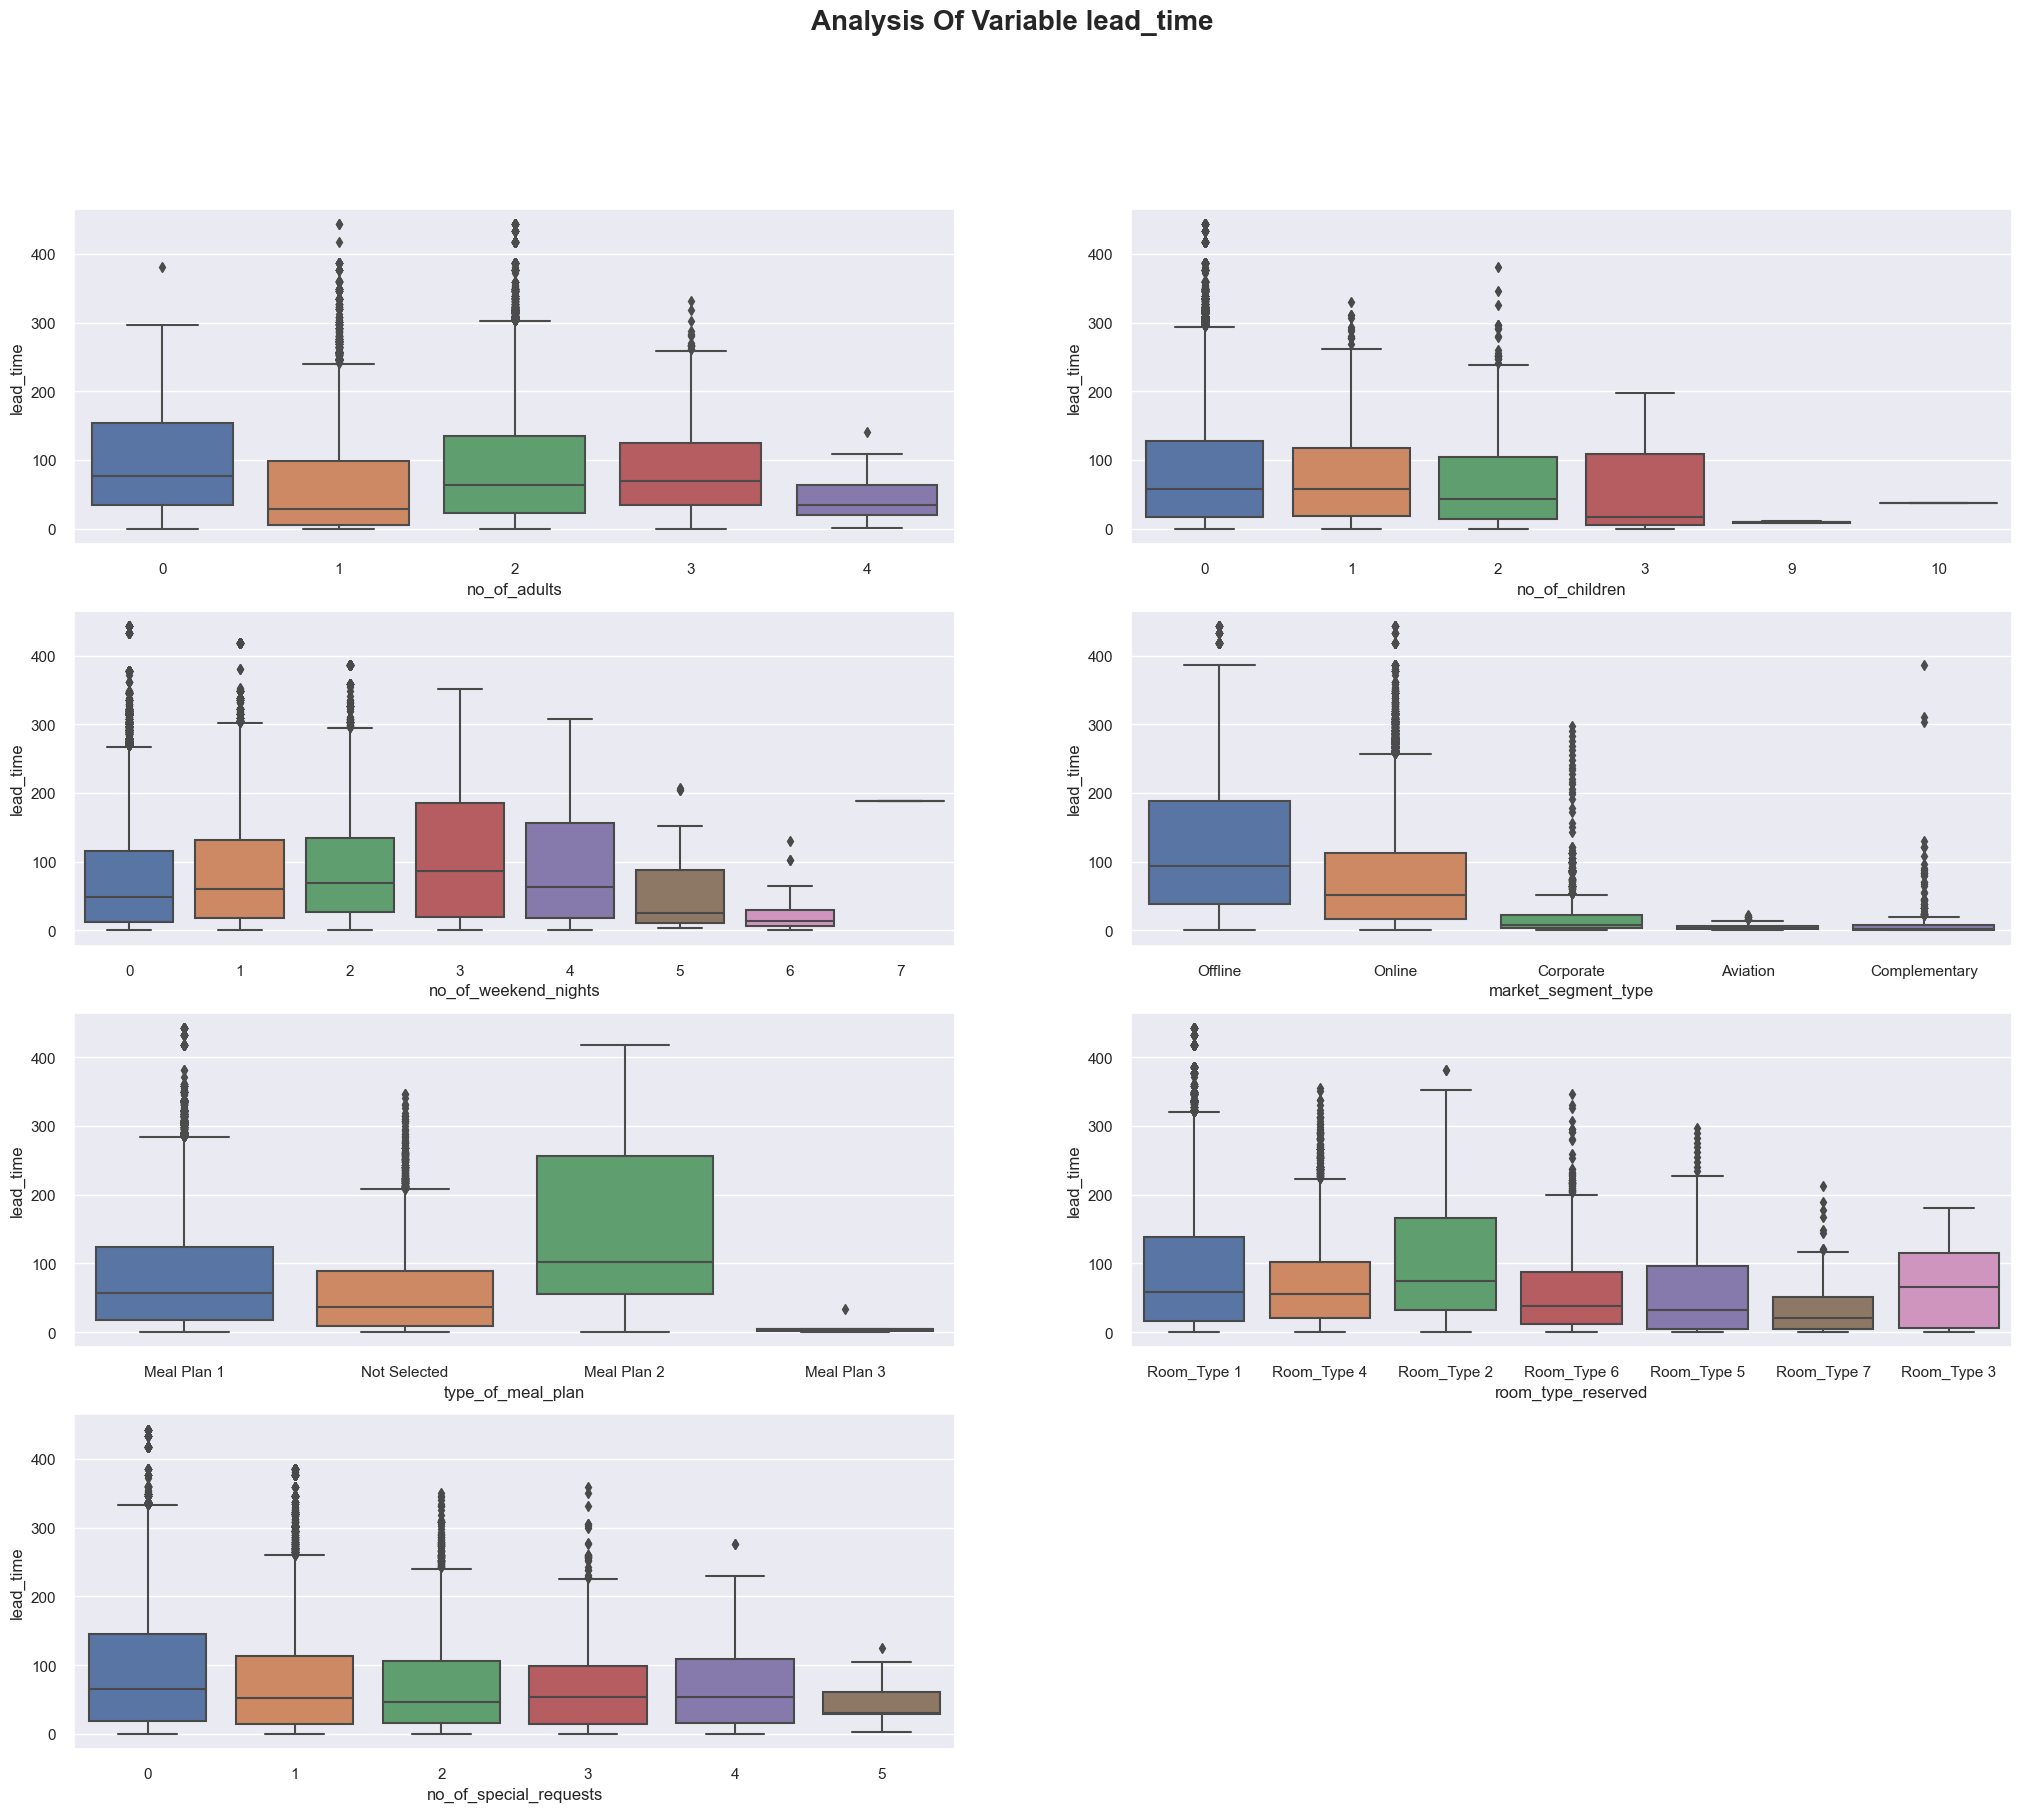

In [17]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

->When we look at the other variables we have some that call our attention, the variable no_weekend_nights usually those who stay 3 or 4 nights have a longer lead_time, when we look at the segment too, guests on "special" reasons usually do not have a high lead time, when we look at meal_plan, guests who use meal_plan2 usually have a very high lead time, when we look at the type of room we see that we have some rooms that are selected faster than others and when we look at the special requests, although it takes, the more requests, the lead time goes down.

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

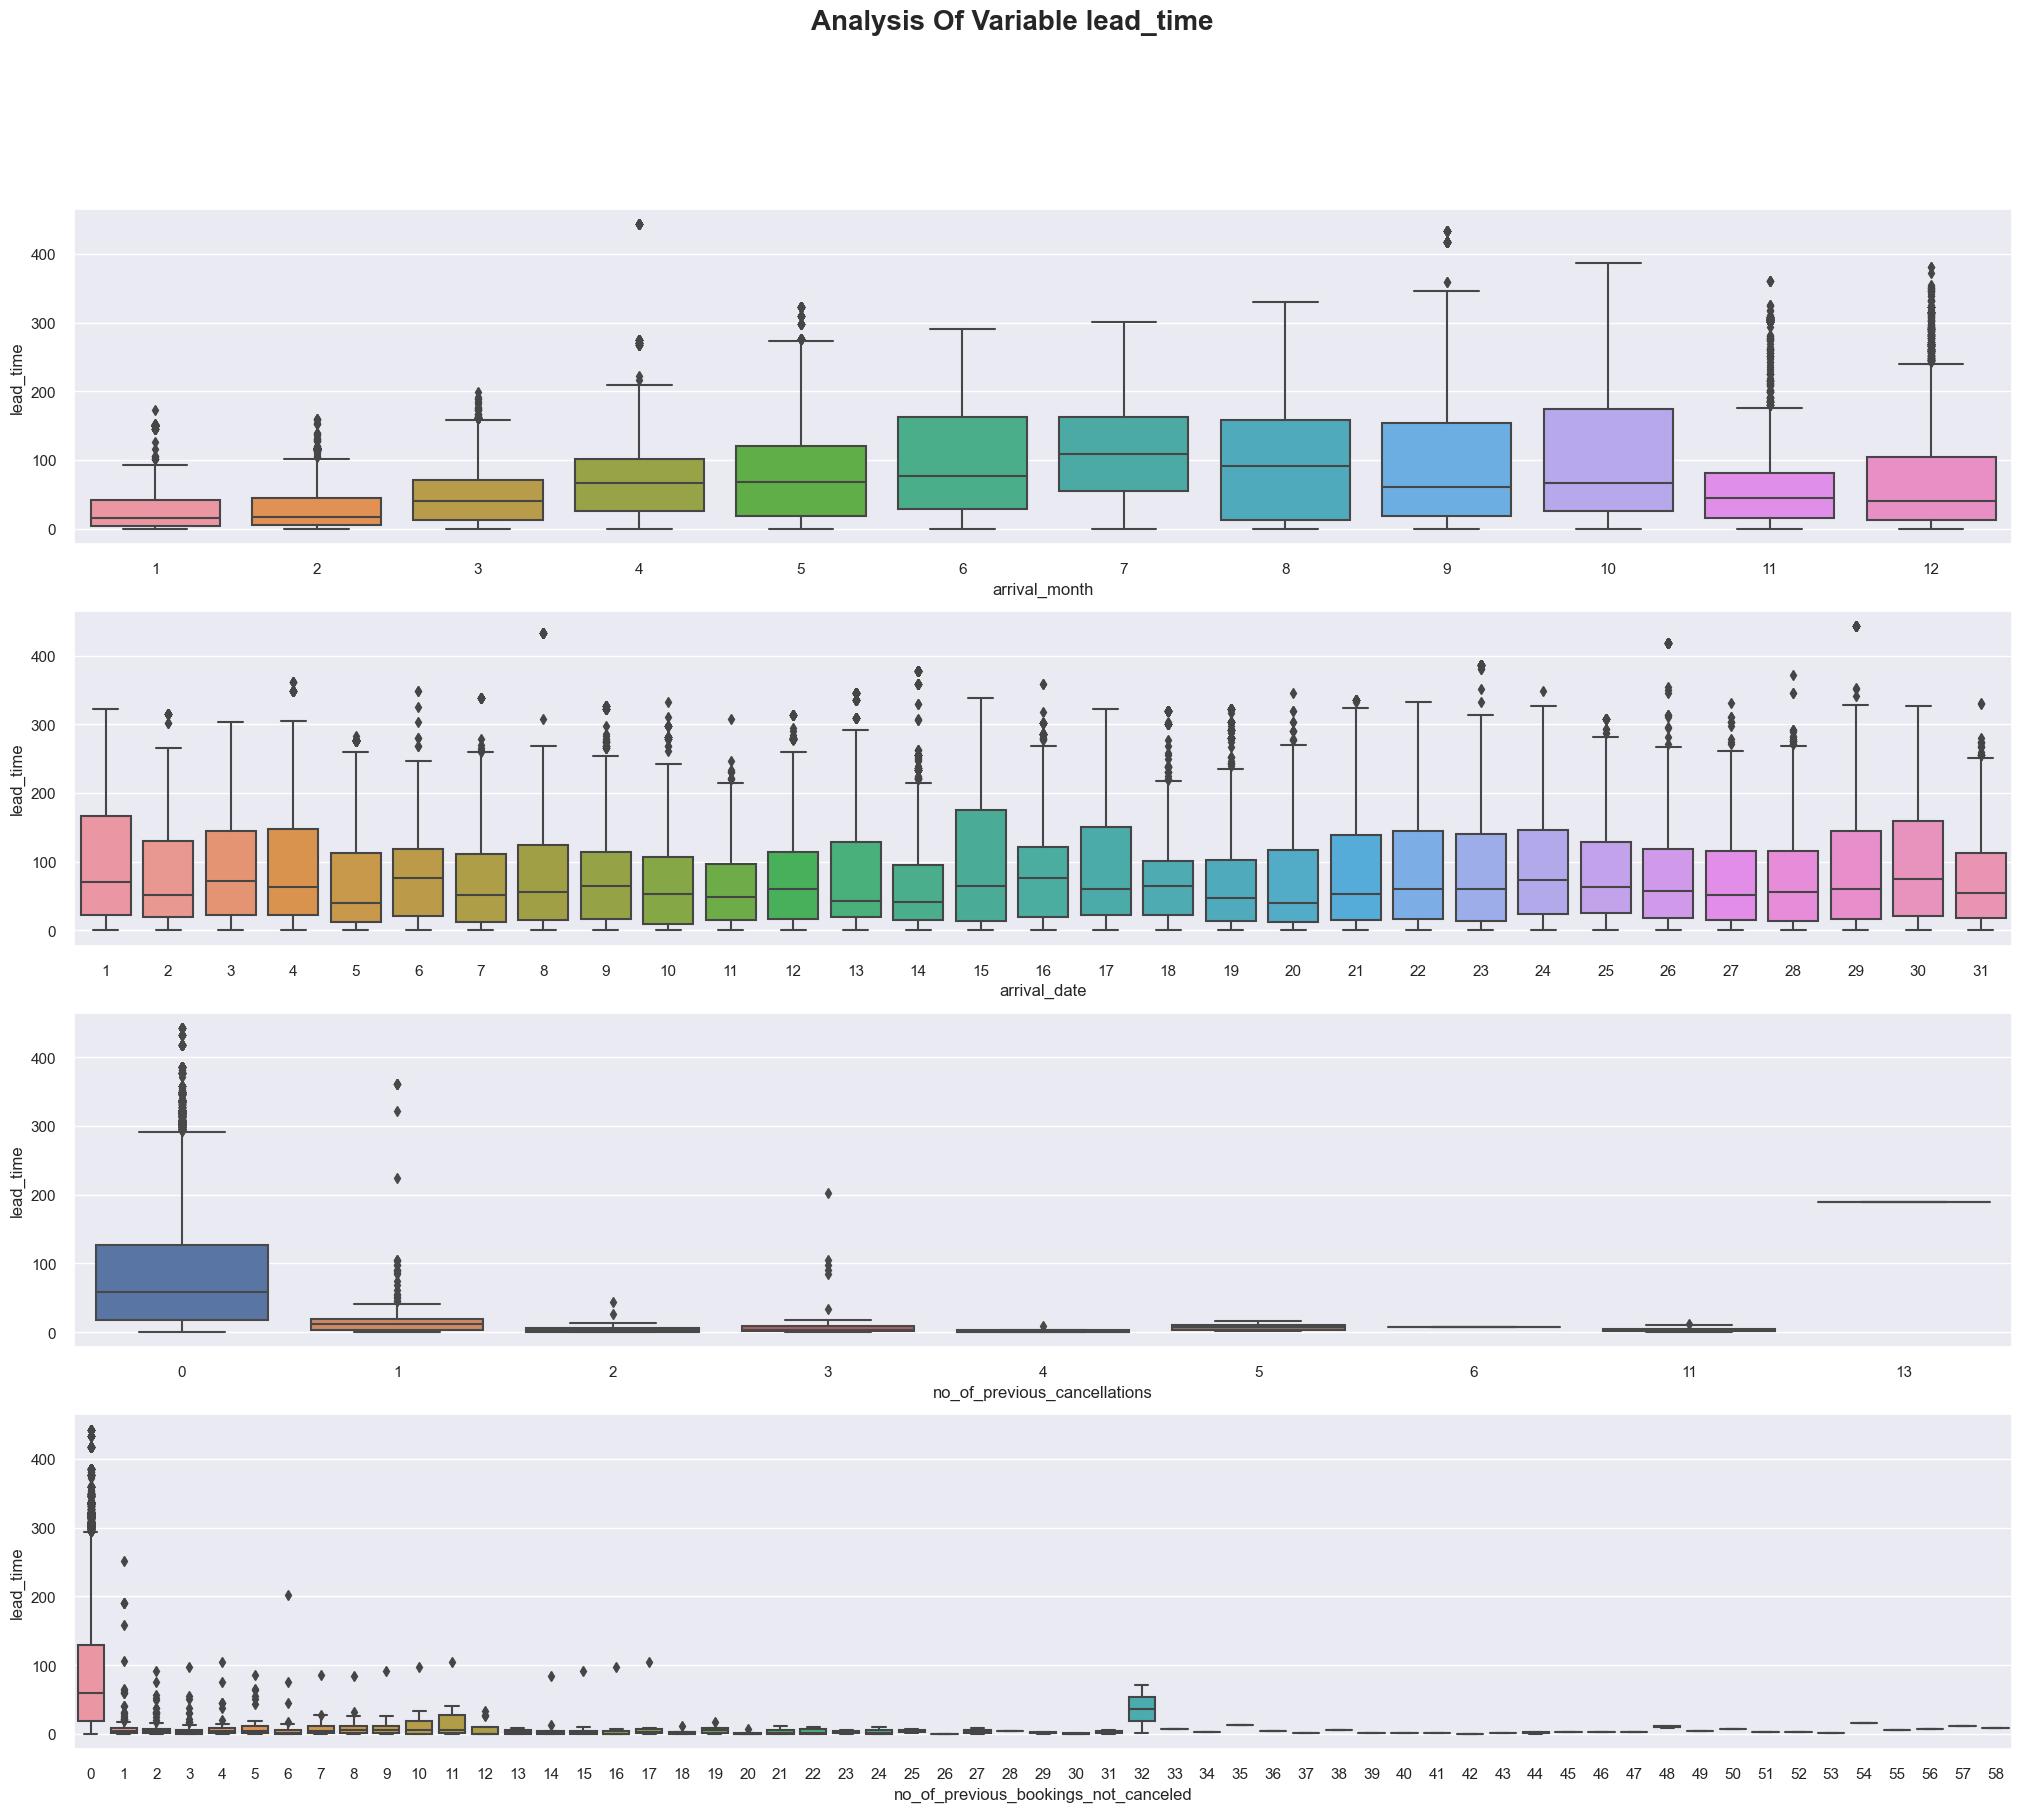

In [18]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

->We can see that at the beginning of the year and at the end of the year are the months in which reservations are made more quickly, when we look at guests who have already canceled and those who have not stayed we can see the same pattern, those who already know the hotel do not have a high lead time.

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

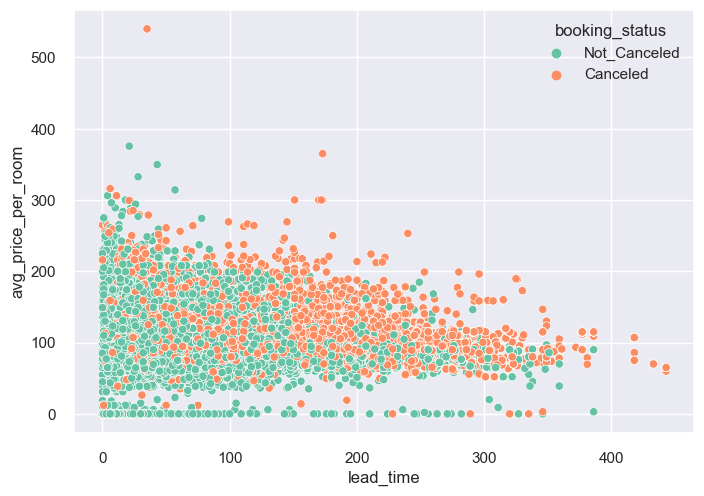

In [19]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

->Looking here we can see that we have a tendency for higher price x higher lead time for cancellations.

# **3. Model Building**

## Data preparation

**Remove Booking_ID**

In [20]:
df = df.drop('Booking_ID', axis = 1)


In [21]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


**Label Encoder**

Use the LabelEncoder to transform our categorical variables into numeric variables.

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [23]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


**Separating into features variables and target variables**

In [24]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

**Balancing class**

As we have many values of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

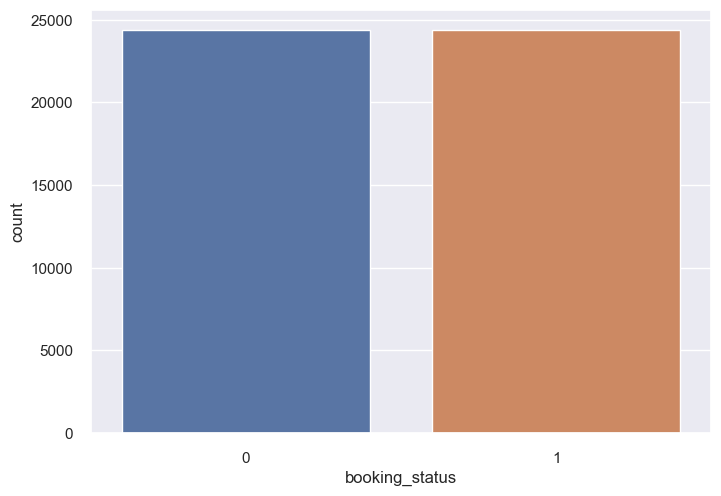

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

**Standard Scale**

We will use StandardScaler to put our data in the same scale

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

**Transforming Data into Train e Test**

Here we will use 30% of our data to test the machine learning models

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 1, K Neighbors
Here we will use the K-Neighbors Model


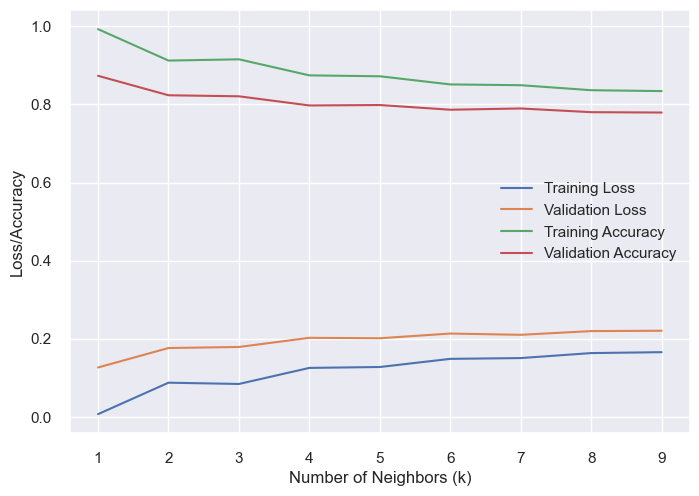

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
k_list = list(range(1,10))
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_predicted = knn.predict(X_train)
    valid_predicted = knn.predict(X_test)
    
    train_loss = np.mean(train_predicted != y_train)
    valid_loss = np.mean(valid_predicted != y_test)
    
    train_accuracy = np.mean(train_predicted == y_train)
    valid_accuracy = np.mean(valid_predicted == y_test)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

plt.plot(k_list, train_losses, label='Training Loss')
plt.plot(k_list, valid_losses, label='Validation Loss')
plt.plot(k_list, train_accuracies, label='Training Accuracy')
plt.plot(k_list, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


->As the value of `k` increases, the training accuracy tends to decrease slightly. This can be attributed to the fact that increasing the number of neighbors considered in the classification decision can introduce more noise or mislabeled points from the training set.

The validation accuracy also exhibits a decreasing trend with increasing `k` values. This suggests that overly large values of `k` may lead to lower generalization performance or increased bias.

From the given results, the model achieves the highest training accuracy of 0.9929 for `k = 1`. However, it's interesting to note that the validation accuracy for this value of `k` is slightly lower at 0.8734. This indicates a possible overfitting situation, where the model performs exceptionally well on the training dataset but struggles to generalize to unseen data.

The validation accuracy seems to stabilize after `k = 4`, with slight fluctuations in subsequent values. This suggests that a range of `k` values around 4 could be considered for potential model selection, as they provide reasonably good performance without overfitting to the training data.

It is essential to further evaluate the model's performance using techniques like cross-validation or tuning hyperparameters to ensure optimal performance on unseen data.

In [29]:

train_accuracies = []
valid_accuracies = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_predicted = knn.predict(X_train)
    valid_predicted = knn.predict(X_test)
    
    train_accuracy = np.mean(train_predicted == y_train)
    valid_accuracy = np.mean(valid_predicted == y_test)
    
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    
    print(f"For k = {k}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {valid_accuracy:.4f}")


For k = 1: Training Accuracy = 0.9929, Validation Accuracy = 0.8734
For k = 2: Training Accuracy = 0.9123, Validation Accuracy = 0.8236
For k = 3: Training Accuracy = 0.9156, Validation Accuracy = 0.8209
For k = 4: Training Accuracy = 0.8745, Validation Accuracy = 0.7975
For k = 5: Training Accuracy = 0.8722, Validation Accuracy = 0.7986
For k = 6: Training Accuracy = 0.8513, Validation Accuracy = 0.7865
For k = 7: Training Accuracy = 0.8493, Validation Accuracy = 0.7897
For k = 8: Training Accuracy = 0.8365, Validation Accuracy = 0.7802
For k = 9: Training Accuracy = 0.8342, Validation Accuracy = 0.7793


In [30]:
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Choose the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=num_folds)

# Print the cross-validated scores
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.78931186 0.79220969 0.79338117 0.79294187 0.78488798]
Average score: 0.7905465130514148


In [31]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
previsoes =knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(previsoes,y_test))


0.8721665788086452
0.7985513188465218


-> Decide to choose k = 3 

In [32]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

0.8208965422987563

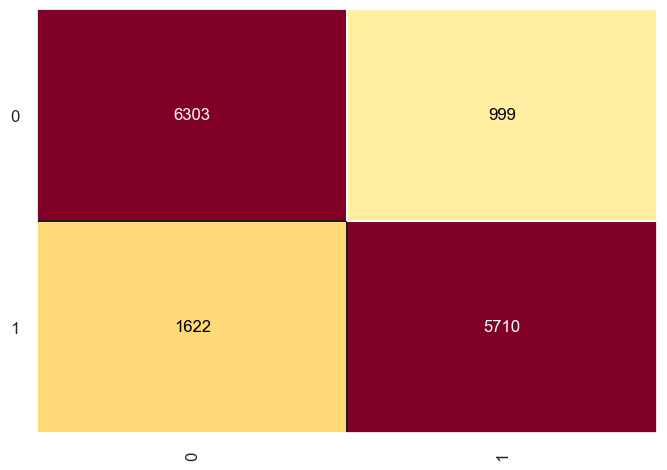

In [33]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [34]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7302
           1       0.85      0.78      0.81      7332

    accuracy                           0.82     14634
   macro avg       0.82      0.82      0.82     14634
weighted avg       0.82      0.82      0.82     14634



=> Result: the model appears to perform reasonably well.
precision: Precision is the proportion of true positive predictions out of all positive predictions. For class 0, the precision is 0.80, indicating that 80% of the predictions for class 0 were correct. For class 1, the precision is 0.85, indicating that 85% of the predictions for class 1 were correct.

recall: Recall is the proportion of true positive predictions out of all actual positive instances. For class 0, the recall is 0.86, indicating that 86% of the actual instances of class 0 were correctly predicted. For class 1, the recall is 0.78, indicating that 78% of the actual instances of class 1 were correctly predicted.

f1-score: The F1-score is a measure that combines both precision and recall into a single metric. For class 0, the F1-score is 0.83, which is the harmonic mean of precision and recall. For class 1, the F1-score is 0.81.

accuracy: The accuracy of the model is 0.82, indicating that 82% of the predictions overall were correct.


In [35]:
#save the result
score_k_neighbors = 0.8208965422987563


## 2, Naive Bayes - Gaussian Model

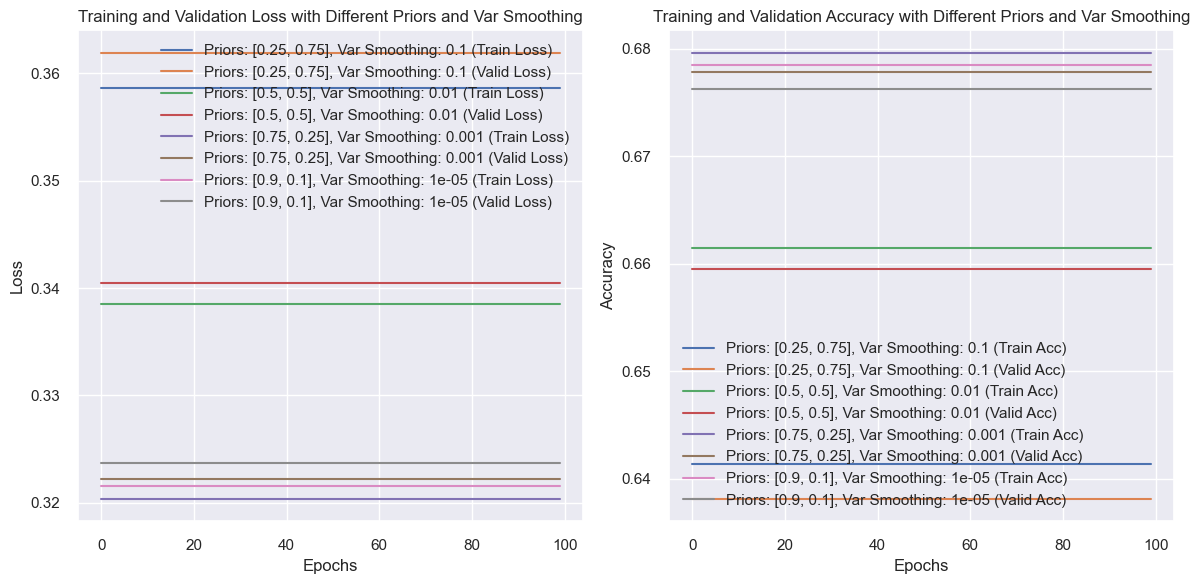

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define different priors and var smoothing values to test
priors_list = [[0.25, 0.75], [0.5, 0.5], [0.75, 0.25],[0.9,0.1]]
var_smoothing_list = [1e-1, 1e-2, 1e-3,1e-5]

num_epochs = 100
train_losses = []
valid_losses = []
train_accs = []
valid_accs = []

# Loop over different combinations of priors and var smoothing
for priors in priors_list:
    for var_smoothing in var_smoothing_list:
        naive_bayes = GaussianNB(priors=priors, var_smoothing=var_smoothing)
        train_loss_epoch = []
        valid_loss_epoch = []
        train_acc_epoch = []
        valid_acc_epoch = []

        # Perform training and calculate losses and accuracies
        for epoch in range(num_epochs):
            naive_bayes.partial_fit(X_train, y_train, classes=np.unique(y_train))
            y_pred_train = naive_bayes.predict(X_train)
            y_pred_valid = naive_bayes.predict(X_test)
            train_loss = 1 - accuracy_score(y_train, y_pred_train)
            valid_loss = 1 - accuracy_score(y_test, y_pred_valid)
            train_acc = accuracy_score(y_train, y_pred_train)
            valid_acc = accuracy_score(y_test, y_pred_valid)
            train_loss_epoch.append(train_loss)
            valid_loss_epoch.append(valid_loss)
            train_acc_epoch.append(train_acc)
            valid_acc_epoch.append(valid_acc)

        # Store the losses and accuracies for each combination
        train_losses.append(train_loss_epoch)
        valid_losses.append(valid_loss_epoch)
        train_accs.append(train_acc_epoch)
        valid_accs.append(valid_acc_epoch)

# Plot the training and validation loss and accuracy curves
plt.figure(figsize=(12, 6))
for i, (priors, var_smoothing) in enumerate(zip(priors_list, var_smoothing_list)):
    label = f'Priors: {priors}, Var Smoothing: {var_smoothing}'
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses[i], label=f'{label} (Train Loss)')
    plt.plot(range(num_epochs), valid_losses[i], label=f'{label} (Valid Loss)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with Different Priors and Var Smoothing')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accs[i], label=f'{label} (Train Acc)')
    plt.plot(range(num_epochs), valid_accs[i], label=f'{label} (Valid Acc)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy with Different Priors and Var Smoothing')
    plt.legend()

plt.tight_layout()
plt.show()


->With some test on priors and var-smoothing, we decide to choose the paramaters: priors=[0.01,0.99], var_smoothing=1e-6

In [37]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB(priors=[0.01,0.99], var_smoothing=1e-6)
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)
y_pred_train=naive_bayes.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(previsoes,y_test))

0.7479353364962221
0.7437474374743748


->Based on the accuracy scores you provided, it appears that the model's accuracy on the training data is 0.748 and the accuracy on the test/validation data is 0.744.

Comparing these accuracy scores, it seems that the model is not overfitting as the accuracy on the training data is relatively similar to the accuracy on the test/validation data

0.7437474374743748

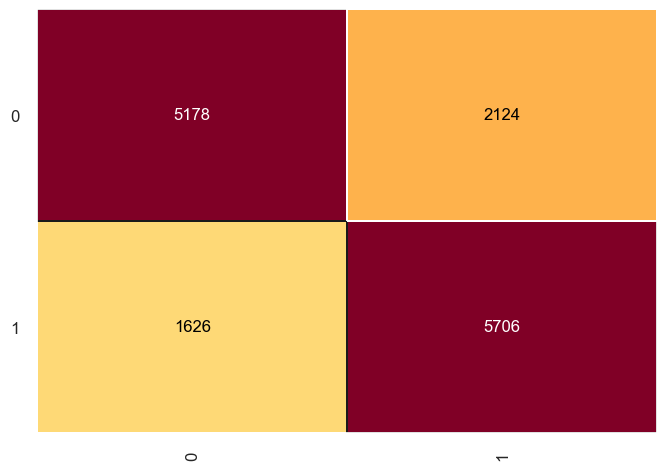

In [38]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [39]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      7302
           1       0.73      0.78      0.75      7332

    accuracy                           0.74     14634
   macro avg       0.74      0.74      0.74     14634
weighted avg       0.74      0.74      0.74     14634



=>Result: These metrics provide an assessment of the model's performance for each class as well as an overall average (macro avg and weighted avg) across all classes. In this case, the precision, recall, and F1-score are relatively similar for both classes, indicating a balanced performance. However, the overall accuracy of 0.74 suggests that the model is correctly predicting approximately 74% of the instances in the dataset

precision: Precision is the proportion of true positive predictions out of all positive predictions. For class 0, the precision is 0.76, indicating that 76% of the predictions for class 0 were correct. For class 1, the precision is 0.73, indicating that 73% of the predictions for class 1 were correct.

recall: Recall is the proportion of true positive predictions out of all actual positive instances. For class 0, the recall is 0.71, indicating that 71% of the actual instances of class 0 were correctly predicted. For class 1, the recall is 0.78, indicating that 78% of the actual instances of class 1 were correctly predicted.

f1-score: The F1-score is a measure that combines both precision and recall into a single metric. For class 0, the F1-score is 0.73, which is the harmonic mean of precision and recall. For class 1, the F1-score is 0.75.

accuracy: The accuracy of the model is 0.74, indicating that 74% of the predictions overall were correct.

In [40]:
#save the result
score_naive_gaussian = 0.7437474374743748

## 3, Decision Tree
We will use the Decision Tree Model, test Entropy and Gini calculations

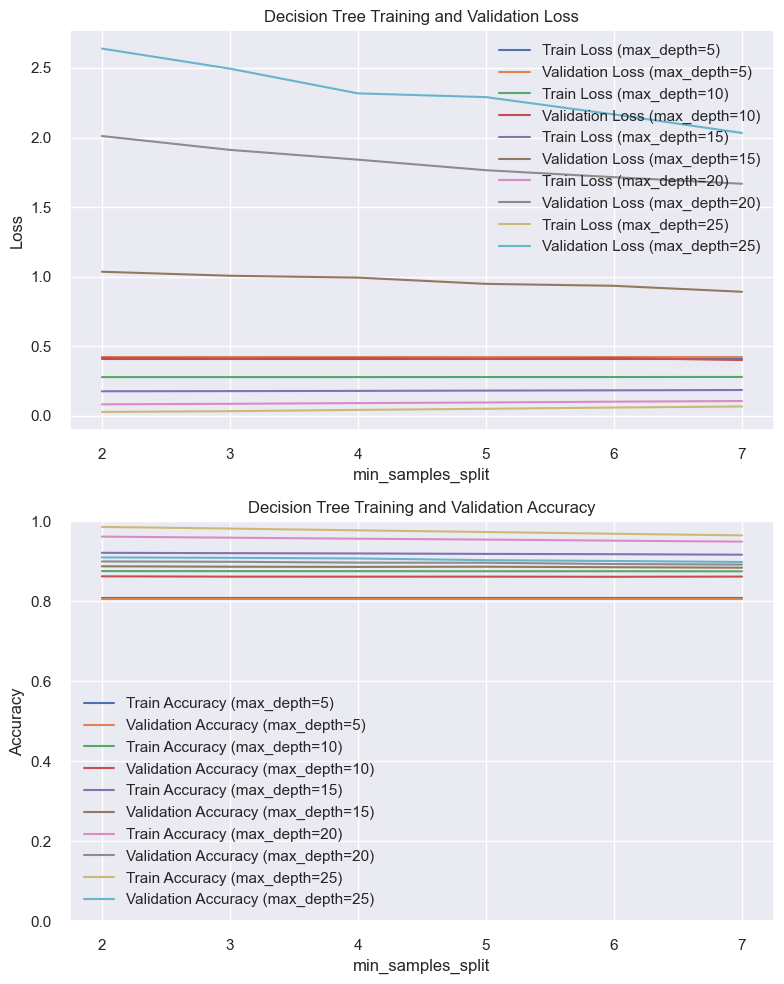

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score

min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([5, 10, 15, 20, 25])
alg = ['gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

# Train the model with different hyperparameter combinations
for max_depth in max_nvl:
    for min_samples_split in min_split:
        for criterion in alg:
            model = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=max_depth, criterion=criterion)

            model.fit(X_train, y_train)

            # Calculate and record the loss values
            train_pred = model.predict_proba(X_train)
            train_loss.append(log_loss(y_train, train_pred))
            valid_pred = model.predict_proba(X_test)
            valid_loss.append(log_loss(y_test, valid_pred))

            # Calculate and record the accuracy values
            train_pred_labels = model.predict(X_train)
            train_acc.append(accuracy_score(y_train, train_pred_labels))
            valid_pred_labels = model.predict(X_test)
            valid_acc.append(accuracy_score(y_test, valid_pred_labels))

# Reshape the loss and accuracy arrays to match the shape of the parameter grid
train_loss = np.array(train_loss).reshape(len(max_nvl), len(min_split), len(alg))
valid_loss = np.array(valid_loss).reshape(len(max_nvl), len(min_split), len(alg))
train_acc = np.array(train_acc).reshape(len(max_nvl), len(min_split), len(alg))
valid_acc = np.array(valid_acc).reshape(len(max_nvl), len(min_split), len(alg))

# Plot the training and validation loss
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

for i, max_depth in enumerate(max_nvl):
    ax[0].plot(min_split, train_loss[i, :, 0], label=f'Train Loss (max_depth={max_depth})')
    ax[0].plot(min_split, valid_loss[i, :, 0], label=f'Validation Loss (max_depth={max_depth})')

ax[0].set_xlabel('min_samples_split')
ax[0].set_ylabel('Loss')
ax[0].set_title('Decision Tree Training and Validation Loss')
ax[0].legend()

# Plot the training and validation accuracy
for i, max_depth in enumerate(max_nvl):
    ax[1].plot(min_split, train_acc[i, :, 0], label=f'Train Accuracy (max_depth={max_depth})')
    ax[1].plot(min_split, valid_acc[i, :, 0], label=f'Validation Accuracy (max_depth={max_depth})')

ax[1].set_xlabel('min_samples_split')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Decision Tree Training and Validation Accuracy')
ax[1].set_ylim([0, 1])
ax[1].legend()

plt.tight_layout()
plt.show()


In [42]:
min_valid_loss = np.min(valid_loss[0, 0])  # Get the minimum validation loss
best_min_samples_split = min_split[np.argmin(valid_loss[0, 0])]  # Get the corresponding min_samples_split value

print(f"The minimum validation loss is {min_valid_loss:.4f} with min_samples_split = {best_min_samples_split}")


The minimum validation loss is 0.4199 with min_samples_split = 2


-> Look at this graph, we decide to choose the criterion = 'gini', min_samples_split = 2, max_depth= 25

Running Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 25, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)
y_pred_train=decision_tree.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(previsoes,y_test))

0.9861477186200434
0.9089107557742244


->Comparing these accuracy scores, it seems that the model is not overfitting as the accuracy on the training data is relatively similar to the accuracy on the test/validation data

0.9089107557742244

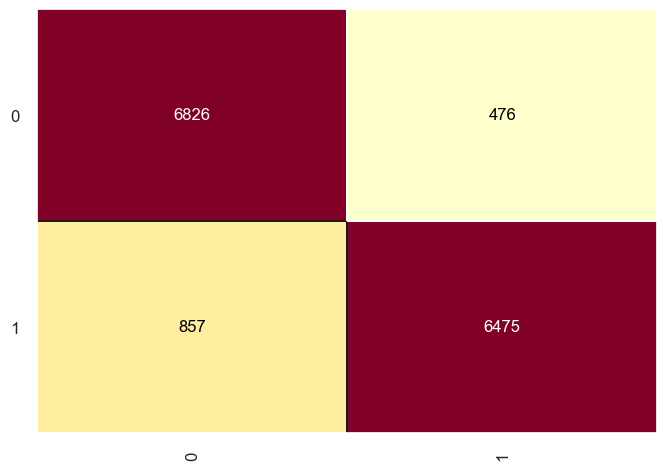

In [44]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [45]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7302
           1       0.93      0.88      0.91      7332

    accuracy                           0.91     14634
   macro avg       0.91      0.91      0.91     14634
weighted avg       0.91      0.91      0.91     14634



=>Result:
Accuracy: The model achieves an overall accuracy of 0.91, indicating that it correctly predicts the class labels for approximately 91% of the instances in the dataset.

Precision: The model achieves a precision of 0.89 and 0.93 for class 0 and class 1, respectively. Precision represents the proportion of correctly predicted positive instances out of all instances predicted as positive. Higher precision indicates a lower rate of false positives.

Recall: The model achieves a recall of 0.93 for class 0 and 0.88 for class 1. Recall, also known as sensitivity or true positive rate, captures the proportion of actual positive instances that the model correctly identifies. Higher recall suggests that the model effectively captures positive instances.

F1-score: The model achieves an F1-score of 0.91 for both classes. The F1-score is the harmonic mean of precision and recall and provides a single metric that balances both measures. A higher F1-score indicates better overall performance.

Support: The support refers to the number of instances in each class. In this case, class 0 has a support of 7302, while class 1 has a support of 7332.

The macro average and weighted average F1-scores are both 0.91, which implies that the model performs consistently across classes and takes class imbalances into account.

Overall, the model's performance seems to be strong, with high accuracy and balanced precision and recall scores.

In [46]:
#save the result
score_tree = 0.9089107557742244

Checking for important variables of the model

In [47]:
columns = df.drop('booking_status', axis = 1).columns
feature_decisionTree = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_decisionTree

lead_time                               0.352105
avg_price_per_room                      0.143022
market_segment_type                     0.106190
no_of_special_requests                  0.092935
arrival_date                            0.082415
arrival_month                           0.067685
no_of_week_nights                       0.044501
no_of_weekend_nights                    0.035669
no_of_adults                            0.024844
arrival_year                            0.013747
type_of_meal_plan                       0.012752
room_type_reserved                      0.009469
required_car_parking_space              0.007633
no_of_children                          0.005961
no_of_previous_bookings_not_canceled    0.000582
repeated_guest                          0.000410
no_of_previous_cancellations            0.000081
dtype: float64

## 4, Random Forest

Applying GridSearch

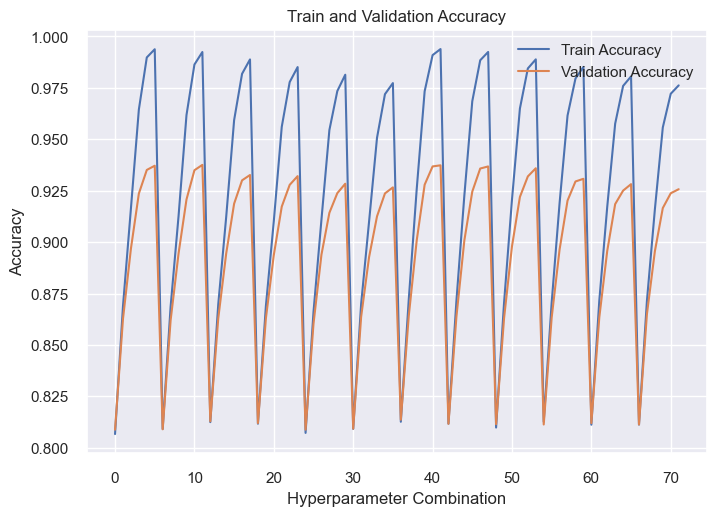

In [48]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have your training and validation data stored in X_train, X_valid, y_train, and y_valid variables

n_estimators = [100]
alg = ['entropy', 'gini']
min_split = [2, 3, 4, 5, 6, 7]
max_nvl = [5,10,15,20,25,30]

# Track train and validation accuracy
train_accuracy = []
valid_accuracy = []

# Loop through all hyperparameter combinations
for n_estimator in n_estimators:
    for criterion in alg:
        for min_samples_split in min_split:
            for max_depth in max_nvl:
                # Instantiate a new model
                model = RandomForestClassifier(n_estimators=n_estimator, 
                                               criterion=criterion, 
                                               min_samples_split=min_samples_split, 
                                               max_depth=max_depth)
                # Fit the model on training data
                model.fit(X_train, y_train)
                # Calculate accuracy on training data
                train_accuracy.append(model.score(X_train, y_train))
                # Calculate accuracy on validation data
                valid_accuracy.append(model.score(X_test, y_test))

# Plot train and validation accuracy curves
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(valid_accuracy, label='Validation Accuracy')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()


Based on the train and validation accuracy values you provided, it seems that the model generally performs well. The accuracy values in both cases are relatively high, ranging from approximately 0.81 to 0.93

->Running Random Forest

In [50]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 3, max_depth= 30,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)
y_pred_train=random_forest.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(previsoes,y_test))

0.992619926199262
0.9374743747437474


->Result: the model seem to be not overfitting as the accuracy on the training data is relatively similar to the accuracy on the test/validation data

0.9374743747437474

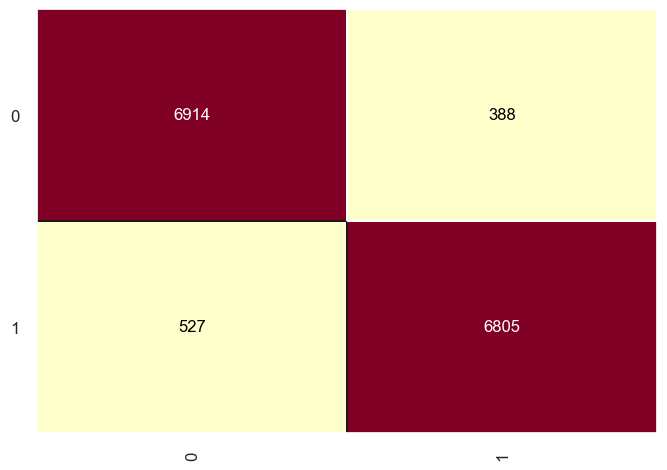

In [51]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [52]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7302
           1       0.95      0.93      0.94      7332

    accuracy                           0.94     14634
   macro avg       0.94      0.94      0.94     14634
weighted avg       0.94      0.94      0.94     14634



=>Result: Overall, the model demonstrates high accuracy and balanced performance across both classes, suggesting that it is a well-performing model capable of accurate predictions.
Precision: Precision is the ratio of true positives to the sum of true positives and false positives. For class 0, the precision is 0.93, indicating that out of all the instances predicted as class 0, 93% are actually class 0. For class 1, the precision is 0.95, meaning that out of all the instances predicted as class 1, 95% are actually class 1.

Recall: Recall is the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.95, implying that out of all the actual class 0 instances, 95% were correctly identified as class 0. For class 1, the recall is 0.93, indicating that out of all the actual class 1 instances, 93% were correctly identified as class 1.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a measure of the model's accuracy that considers both precision and recall. The F1-score for class 0 is 0.94 and for class 1, it is also 0.94.

Accuracy: Accuracy is the ratio of correct predictions to the total number of instances. The accuracy of the model is 0.94, indicating that the model predicted the correct class for 94% of the instances.

Macro Avg: Macro average calculates the average performance across all classes, giving equal weight to each class. For precision, recall, and F1-score, the macro average is 0.94, showing excellent overall performance across both classes.

Weighted Avg: Weighted average calculates the average performance across all classes, considering the number of instances in each class. For precision, recall, and F1-score, the weighted average is 0.94, suggesting consistent performance across both classes, taking into account the class distribution.

In [53]:
#save result
score_random_forest = 0.9374743747437474

Checking for important variables of the model

In [54]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

lead_time                               0.318747
avg_price_per_room                      0.148563
no_of_special_requests                  0.113507
arrival_date                            0.086796
arrival_month                           0.082352
market_segment_type                     0.061987
no_of_week_nights                       0.048674
no_of_weekend_nights                    0.035465
arrival_year                            0.029149
no_of_adults                            0.022846
type_of_meal_plan                       0.016623
room_type_reserved                      0.014637
required_car_parking_space              0.007756
no_of_children                          0.006796
repeated_guest                          0.003242
no_of_previous_bookings_not_canceled    0.002463
no_of_previous_cancellations            0.000397
dtype: float64

## 5, Extra Trees

In this model, we just apply GridSearch to find best parameters

In [55]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([200])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([200])})

->ExtraTrees - GridSearch

In [56]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.9227434459919982


In [57]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators = 200, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)
y_pred_train=extra_trees.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(previsoes,y_test))

0.9938792245065308
0.9353560202268689


->The model seem to be very good

0.9353560202268689

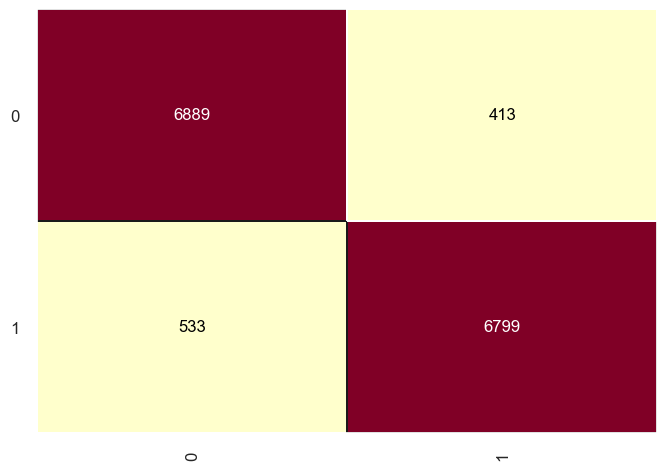

In [58]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [59]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7302
           1       0.94      0.93      0.93      7332

    accuracy                           0.94     14634
   macro avg       0.94      0.94      0.94     14634
weighted avg       0.94      0.94      0.94     14634



=>Result: Overall, the model demonstrates high accuracy and balanced performance across both classes, indicating that it is well-performing and capable of accurate predictions.
Precision: Precision is the ratio of true positives to the sum of true positives and false positives. For class 0, the precision is 0.93, meaning that out of all the instances predicted as class 0, 93% are actually class 0. For class 1, the precision is 0.94, indicating that out of all the instances predicted as class 1, 94% are actually class 1.

Recall: Recall is the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.94, implying that out of all the actual class 0 instances, 94% were correctly identified as class 0. For class 1, the recall is 0.93, meaning that out of all the actual class 1 instances, 93% were correctly identified as class 1.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a measure of the model's accuracy that considers both precision and recall. The F1-score for class 0 is 0.94, and for class 1, it is 0.93.

Accuracy: Accuracy is the ratio of correct predictions to the total number of instances. The accuracy of the model is 0.94, which means that the model predicted the correct class for 94% of the instances.

Macro Avg: Macro average calculates the average performance across all classes, giving equal weight to each class. For precision, recall, and F1-score, the macro average is 0.94, indicating excellent overall performance across both classes.

Weighted Avg: Weighted average calculates the average performance across all classes, considering the number of instances in each class. For precision, recall, and F1-score, the weighted average is 0.94, suggesting consistent performance across both classes, taking into account the class distribution.

In [60]:
#save result
score_extra = 0.9353560202268689

Checking for important variables of the model

In [61]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)
feature_extra

lead_time                               0.277176
avg_price_per_room                      0.117499
no_of_special_requests                  0.113731
arrival_month                           0.093535
arrival_date                            0.092080
no_of_week_nights                       0.062906
market_segment_type                     0.054648
no_of_weekend_nights                    0.045851
arrival_year                            0.037971
no_of_adults                            0.031627
type_of_meal_plan                       0.023615
room_type_reserved                      0.020249
no_of_children                          0.009789
repeated_guest                          0.009235
required_car_parking_space              0.008845
no_of_previous_bookings_not_canceled    0.000728
no_of_previous_cancellations            0.000513
dtype: float64

## 6, Gradient Boosting

Applying GridSearch

Learning Rate: 0.1
Train Loss: 0.17149885784572128
Valid Loss: 0.17459341260079264
--------------------------
Learning Rate: 0.2
Train Loss: 0.14686932583611545
Valid Loss: 0.15463987973213067
--------------------------
Learning Rate: 0.3
Train Loss: 0.13705851344227726
Valid Loss: 0.14698646986469865
--------------------------
Learning Rate: 0.4
Train Loss: 0.12838985532712466
Valid Loss: 0.13994806614732813
--------------------------
Learning Rate: 0.5
Train Loss: 0.12259122591225913
Valid Loss: 0.13591635916359168
--------------------------
Learning Rate: 0.6
Train Loss: 0.12197621976219764
Valid Loss: 0.13755637556375566
--------------------------
Learning Rate: 0.7
Train Loss: 0.11386399578281492
Valid Loss: 0.13058630586305864
--------------------------
Learning Rate: 0.8
Train Loss: 0.11201897733263044
Valid Loss: 0.13202132021320212
--------------------------
Learning Rate: 0.005
Train Loss: 0.22913371990862763
Valid Loss: 0.22509225092250917
--------------------------
Learning

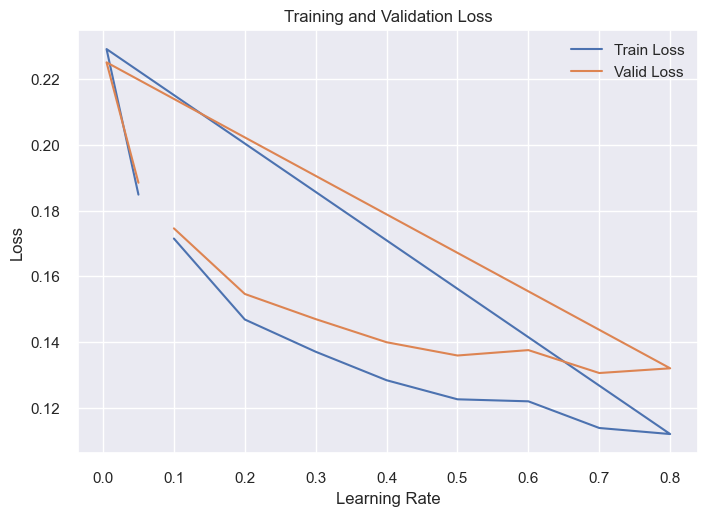

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

n_estimators = np.array([300])
learning_rate = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.005,0.05])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

train_losses = []
valid_losses = []

model = GradientBoostingClassifier()

for lr in values_grid['learning_rate']:
    model.learning_rate = lr
    model.fit(X_train, y_train)
  
    train_loss = 1 - model.score(X_train, y_train)
    valid_loss = 1 - model.score(X_test, y_test)
  
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print("Learning Rate:", lr)
    print("Train Loss:", train_loss)
    print("Valid Loss:", valid_loss)
    print("--------------------------")

# Plot the training and validation loss graph
plt.plot(values_grid['learning_rate'], train_losses, label='Train Loss')
plt.plot(values_grid['learning_rate'], valid_losses, label='Valid Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



->We test the learning rate in different scope and narrow down slowly to find the best suitable parameter.
The train loss and valid loss values are both relatively low and similar across different learning rates.

->Decide to choose learning_rate = 0.7 to bulid the lass model to evaluate the performance 

In [105]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.7, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)
y_pred_train=grad_boost.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(previsoes,y_test))

0.9188777602061735
0.8852671860051934


->An accuracy score of 0.92 on the training data suggests that the model performs well on the data it was trained on, correctly predicting approximately 92% of the instances.The accuracy score of 0.89 on the test data suggests that the model generalizes reasonably well to unseen data. It predicts the correct class for approximately 89% of the instances in the test set, indicating good overall performance.

In summary, the model appears to perform well, achieving high accuracy on both the training and test data

0.8852671860051934

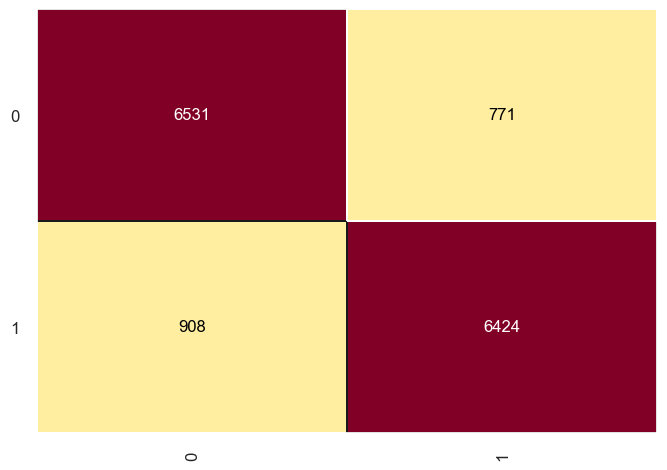

In [106]:
cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [107]:
classification_grad_standard = (classification_report(y_test, previsoes))
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7302
           1       0.89      0.88      0.88      7332

    accuracy                           0.89     14634
   macro avg       0.89      0.89      0.89     14634
weighted avg       0.89      0.89      0.89     14634



->Result:Overall, the model demonstrates high accuracy and balanced performance across both classes, indicating that it is well-performing and capable of accurate predictions.
Precision: Precision is the ratio of true positives to the sum of true positives and false positives. For class 0, the precision is 0.88, meaning that out of all the instances predicted as class 0, 88% are actually class 0. For class 1, the precision is 0.89, indicating that out of all the instances predicted as class 1, 89% are actually class 1.

Recall: Recall is the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.9, implying that out of all the actual class 0 instances, 90% were correctly identified as class 0. For class 1, the recall is 0.88, meaning that out of all the actual class 1 instances, 88% were correctly identified as class 1.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a measure of the model's accuracy that considers both precision and recall. The F1-score for class 0 is 0.89, and for class 1, it is 0.88.

Accuracy: Accuracy is the ratio of correct predictions to the total number of instances. The accuracy of the model is 0.89, which means that the model predicted the correct class for 89% of the instances.

Macro Avg: Macro average calculates the average performance across all classes, giving equal weight to each class. For precision, recall, and F1-score, the macro average is 0.89, indicating good overall performance across both classes.

Weighted Avg: Weighted average calculates the average performance across all classes, considering the number of instances in each class. For precision, recall, and F1-score, the weighted average is 0.89, suggesting consistent performance across both classes, taking into account the class distribution.

In [89]:
score_grad_standard = 0.8852671860051934

## 7, Neural Network

In [172]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_convert, test_size = 0.3, random_state = 20)


In [143]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [178]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers

model = Sequential()
model.add(Dense(100, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(200, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))

from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

model.fit(X_train, y_train, epochs = 80, batch_size = 128, validation_data = (X_test, y_test), verbose = 1)


Epoch 1/80
267/267 [==============================] - 2s 5ms/step - loss: 0.4728 - acc: 0.7786 - val_loss: 0.4312 - val_acc: 0.7975
Epoch 2/80
267/267 [==============================] - 1s 4ms/step - loss: 0.4291 - acc: 0.8016 - val_loss: 0.4151 - val_acc: 0.8083
Epoch 3/80
267/267 [==============================] - 1s 4ms/step - loss: 0.4137 - acc: 0.8080 - val_loss: 0.3979 - val_acc: 0.8150
Epoch 4/80
267/267 [==============================] - 1s 4ms/step - loss: 0.4019 - acc: 0.8132 - val_loss: 0.3857 - val_acc: 0.8266
Epoch 5/80
267/267 [==============================] - 1s 4ms/step - loss: 0.3941 - acc: 0.8197 - val_loss: 0.3778 - val_acc: 0.8299
Epoch 6/80
267/267 [==============================] - 1s 4ms/step - loss: 0.3856 - acc: 0.8230 - val_loss: 0.3713 - val_acc: 0.8344
Epoch 7/80
267/267 [==============================] - 1s 4ms/step - loss: 0.3796 - acc: 0.8272 - val_loss: 0.3679 - val_acc: 0.8355
Epoch 8/80
267/267 [==============================] - 1s 4ms/step - loss: 0.

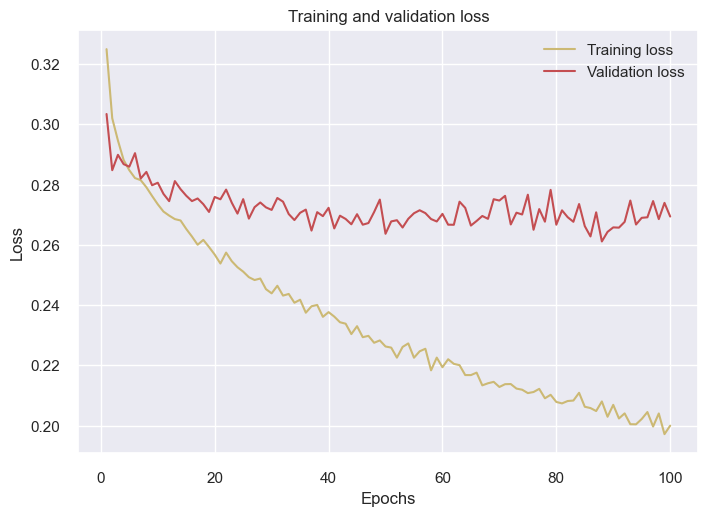

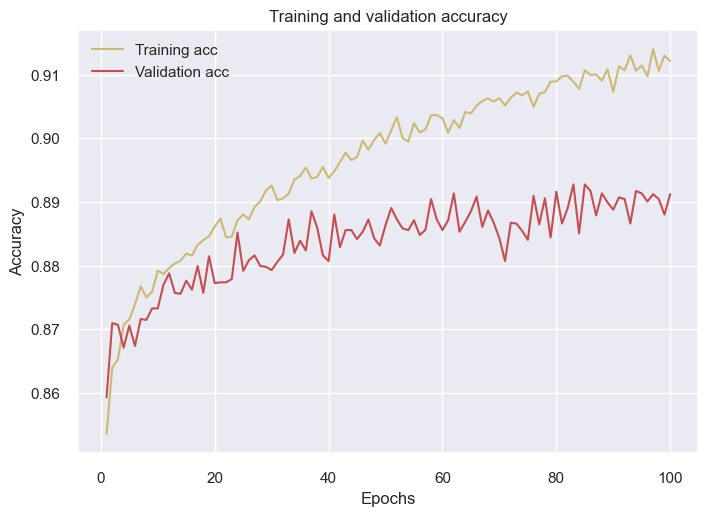

In [179]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

After trainning the model, i still can not reduce the overfit, so I accept the accuracy of 0.8775

In [186]:
score_neural_network = 0.8775

# **4. Evaluation**

## Chi-square test
Checking the variables to predict the outcome with chi-square test

In [187]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score'])

In [188]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
lead_time,797722.63
avg_price_per_room,12869.91
no_of_previous_bookings_not_canceled,5390.79
no_of_special_requests,4088.34
repeated_guest,819.60
required_car_parking_space,485.70
no_of_week_nights,441.53
no_of_previous_cancellations,418.67
no_of_weekend_nights,183.33
market_segment_type,132.63


=> The most important variable for machine learning models to arrive at the final result was actually the Lead_Time variable, followed by Avg_price_room and Number of special requests, something we were able to verify in our data analysis, which confirms our suspicions made earlier

## Results

In [189]:
Naive_dict = {'Model':'Naive Bayes',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Type': 'Gini',
               'Precision':score_random_forest}

KNN_dict = {'Model':'KNN',
               'Type':'-',
               'Precision':score_k_neighbors}

Extra_dict = {'Model':'Extra Trees',
               'Type': 'entropy',
               'Precision':score_extra}

grad_dict = {'Model':'GradientBoost',
               'Type':'-',
               'Precision':score_grad_standard}

neural_dict = {'Model':'Neural Network',
               'Type':'-',
               'Precision':score_neural_network}

In [190]:
resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'KNN':pd.Series(KNN_dict),
                       'GradientBoosting':pd.Series(grad_dict),
                       'Neural Network':pd.Series(neural_dict)
                      })

In [191]:
resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,GradientBoosting,Neural Network
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,GradientBoost,Neural Network
Type,Gaussian,Gini,Gini,entropy,-,-,-
Precision,0.743747,0.908911,0.937474,0.935356,0.820897,0.885267,0.8775


=> The best model was the Ranodm Forest with 93.74% accuracy, the model was able to predict both results, after that is Extra Trees with 93,53%